# Unsupervised Learning: Trade&Ahead

**Marks: 60**

### Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


### Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share 
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries and data

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [2]:

data = pd.read_csv('stock_data.csv')

## Data Overview

- Observations
- Sanity checks

### Checking the shape of the dataset

In [3]:
data.shape
rows, columns = data.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 340
Number of columns: 15


### Displaying first five  rows of the dataset

In [4]:
data.head()

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,AAL,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810


### Displaying few rows of the dataset

In [5]:
data.sample(n=10, random_state=1)

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
102,DVN,Devon Energy Corp.,Energy,Oil & Gas Exploration & Production,32.000000,-15.478079,2.923698,205,70,830000000,-14454000000,-35.55,4.065823e+08,93.089287,1.785616
125,FB,Facebook,Information Technology,Internet Software & Services,104.660004,16.224320,1.320606,8,958,592000000,3669000000,1.31,2.800763e+09,79.893133,5.884467
11,AIV,Apartment Investment & Mgmt,Real Estate,REITs,40.029999,7.578608,1.163334,15,47,21818000,248710000,1.52,1.636250e+08,26.335526,-1.269332
248,PG,Procter & Gamble,Consumer Staples,Personal Products,79.410004,10.660538,0.806056,17,129,160383000,636056000,3.28,4.913916e+08,24.070121,-2.256747
238,OXY,Occidental Petroleum,Energy,Oil & Gas Exploration & Production,67.610001,0.865287,1.589520,32,64,-588000000,-7829000000,-10.23,7.652981e+08,93.089287,3.345102
336,YUM,Yum! Brands Inc,Consumer Discretionary,Restaurants,52.516175,-8.698917,1.478877,142,27,159000000,1293000000,2.97,4.353535e+08,17.682214,-3.838260
112,EQT,EQT Corporation,Energy,Oil & Gas Exploration & Production,52.130001,-21.253771,2.364883,2,201,523803000,85171000,0.56,1.520911e+08,93.089287,9.567952
147,HAL,Halliburton Co.,Energy,Oil & Gas Equipment & Services,34.040001,-5.101751,1.966062,4,189,7786000000,-671000000,-0.79,8.493671e+08,93.089287,17.345857
89,DFS,Discover Financial Services,Financials,Consumer Finance,53.619999,3.653584,1.159897,20,99,2288000000,2297000000,5.14,4.468872e+08,10.431906,-0.375934
173,IVZ,Invesco Ltd.,Financials,Asset Management & Custody Banks,33.480000,7.067477,1.580839,12,67,412000000,968100000,2.26,4.283628e+08,14.814159,4.218620


### Checking the data types of the columns for the dataset

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

###### Observation
* There is 4 integer, 7 float and 4 object columns are in this data.

### Creating a copy of original data

In [7]:
df = data.copy()

### Checking the duplicate values

In [8]:
df.duplicated().sum()

0

###### Observation
* There is no duplicated values in this data.

### Checking the missing values

In [9]:
df.isna().sum()

Ticker Symbol                   0
Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

###### Observation
* There is no missing values in this data.

### Statistical summary of the dataset

In [10]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Ticker Symbol,340,340,AAL,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Security,340,340,American Airlines Group,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sector,340,11,Industrials,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sub Industry,340,104,Oil & Gas Exploration & Production,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Current Price,340.0,NaN,NaN,NaN,80.862345,98.055086,4.5,38.555,59.705,92.880001,1274.949951
Price Change,340.0,NaN,NaN,NaN,4.078194,12.006338,-47.129693,-0.939484,4.819505,10.695493,55.051683
Volatility,340.0,NaN,NaN,NaN,1.525976,0.591798,0.733163,1.134878,1.385593,1.695549,4.580042
ROE,340.0,NaN,NaN,NaN,39.597059,96.547538,1.0,9.75,15.0,27.0,917.0
Cash Ratio,340.0,NaN,NaN,NaN,70.023529,90.421331,0.0,18.0,47.0,99.0,958.0
Net Cash Flow,340.0,NaN,NaN,NaN,55537620.588235,1946365312.175789,-11208000000.0,-193906500.0,2098000.0,169810750.0,20764000000.0


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

### Univariate analysis

In [11]:
#function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=df, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        df[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        df[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

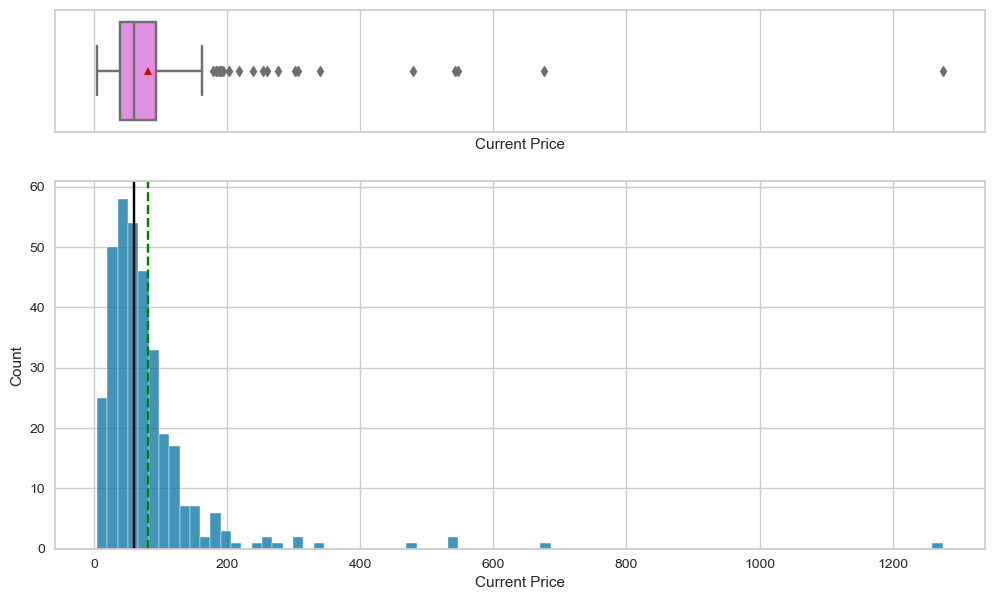

In [12]:
histogram_boxplot(df, 'Current Price')

#### Observation:
- Current price has some outliers. we are deleting the outliers since it important data.

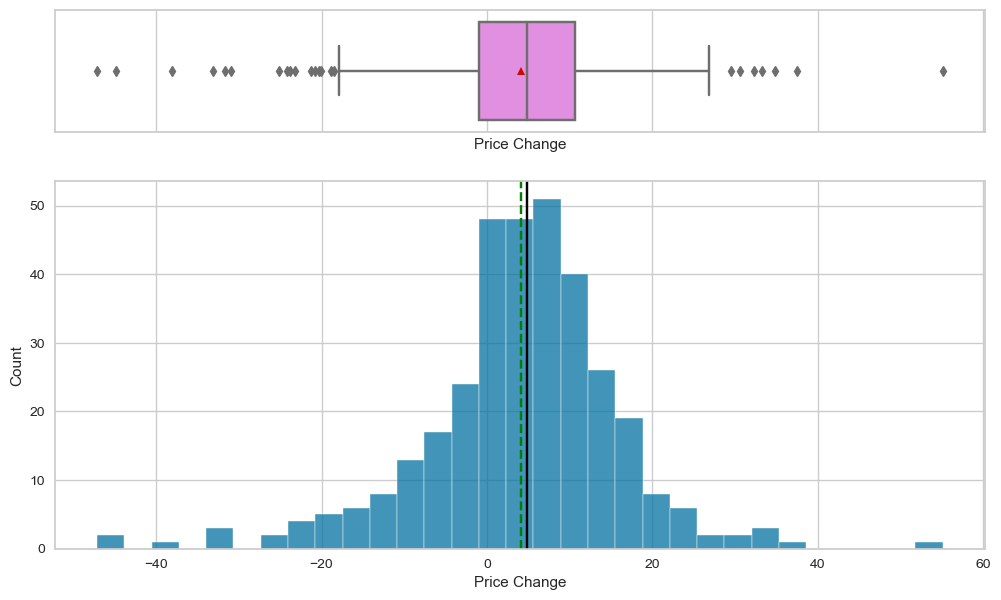

In [13]:
histogram_boxplot(df, 'Price Change')

#### Observation:
- Price Change looks like slightly left skewed

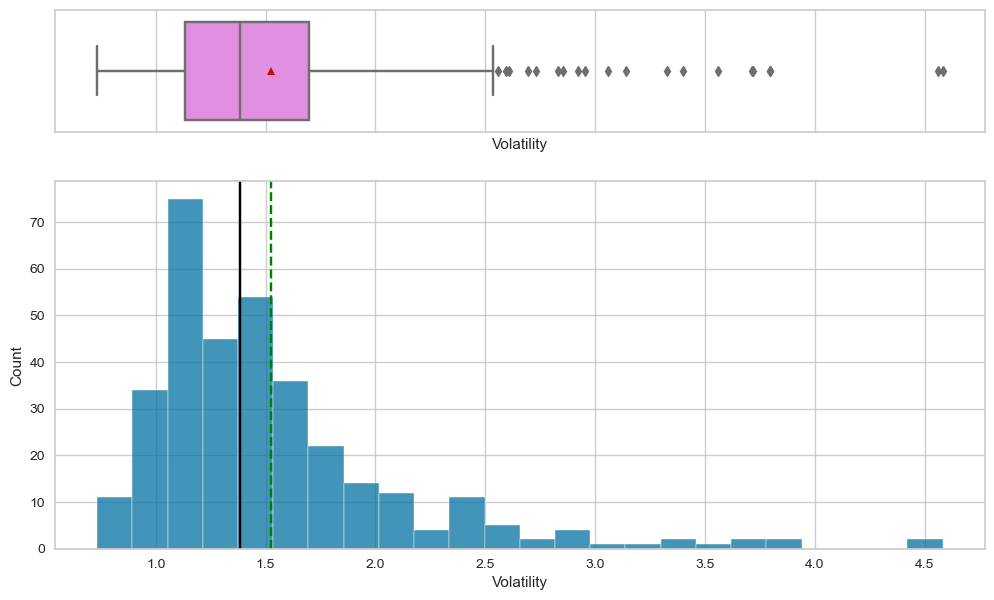

In [14]:
histogram_boxplot(df, 'Volatility')

Volatility has some outliers.

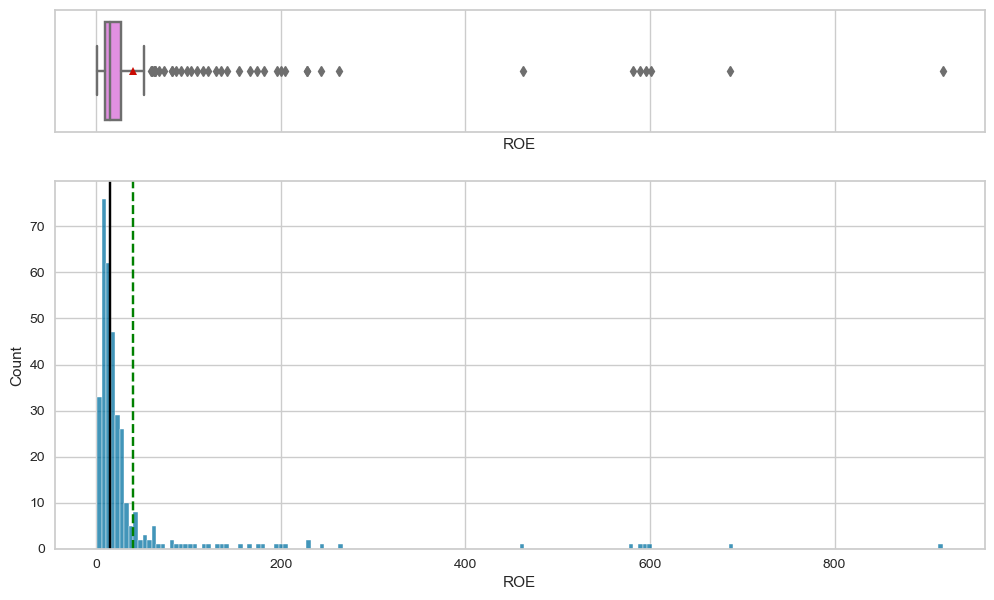

In [15]:
histogram_boxplot(df, 'ROE')

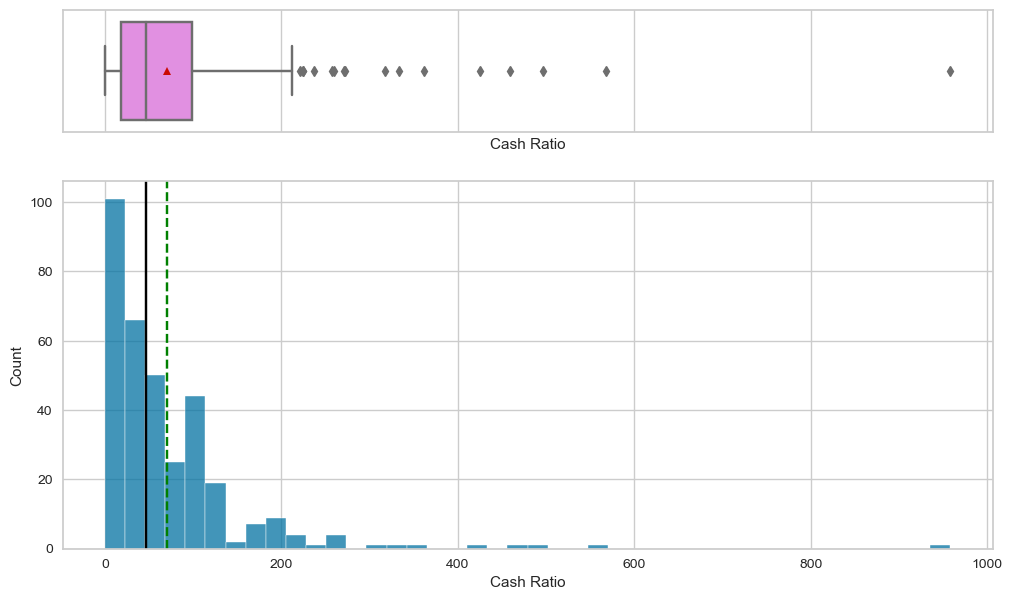

In [16]:
histogram_boxplot(df, 'Cash Ratio')

Cash ratio is positive and no negative that is good.

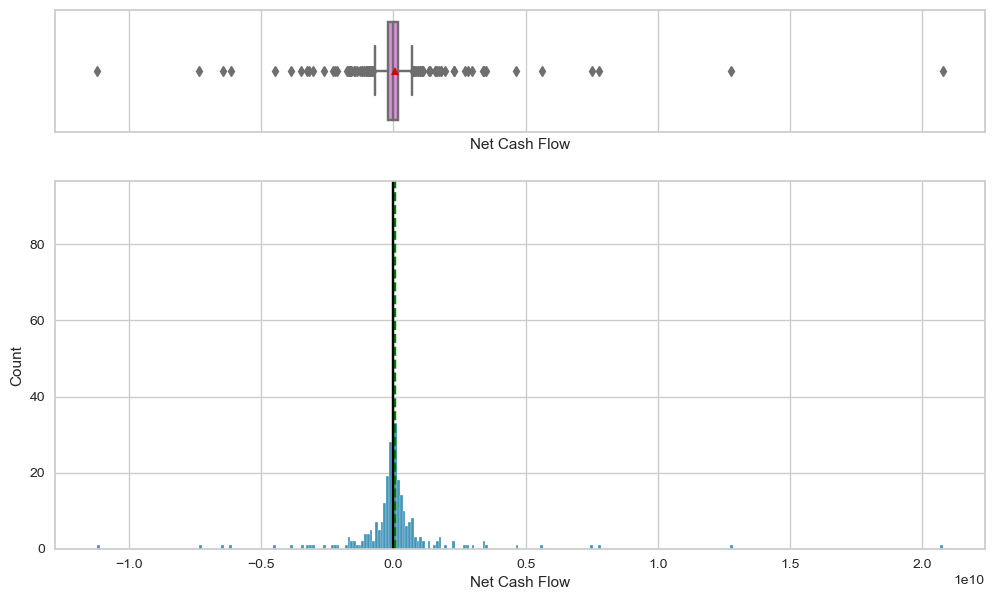

In [17]:
histogram_boxplot(df, 'Net Cash Flow')

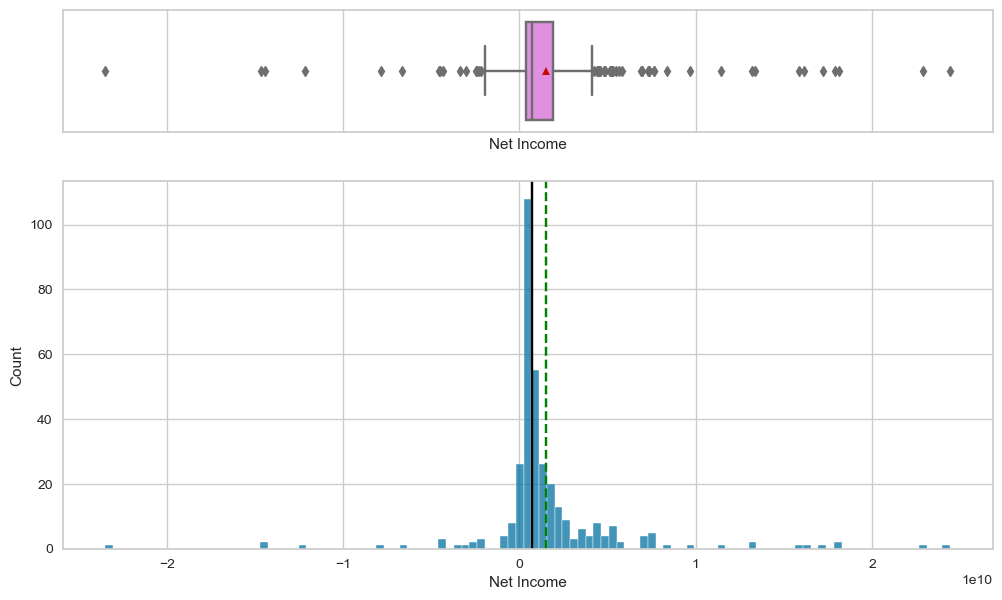

In [18]:
histogram_boxplot(df, 'Net Income')

Mean of net income is positive 

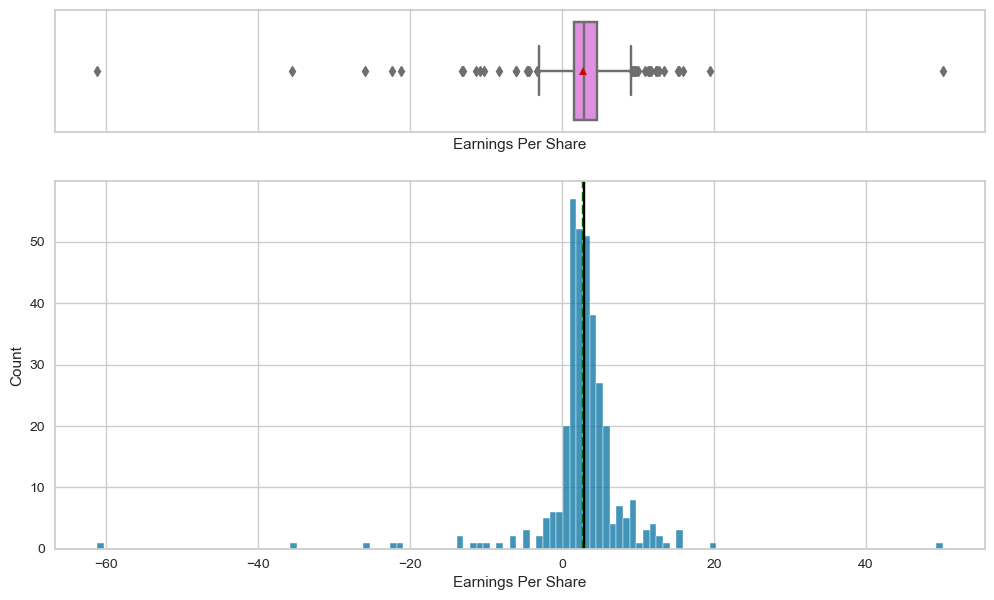

In [19]:
bhistogram_boxplot(df, 'Earnings Per Share')

Earnings per share has negative values and median is positive.

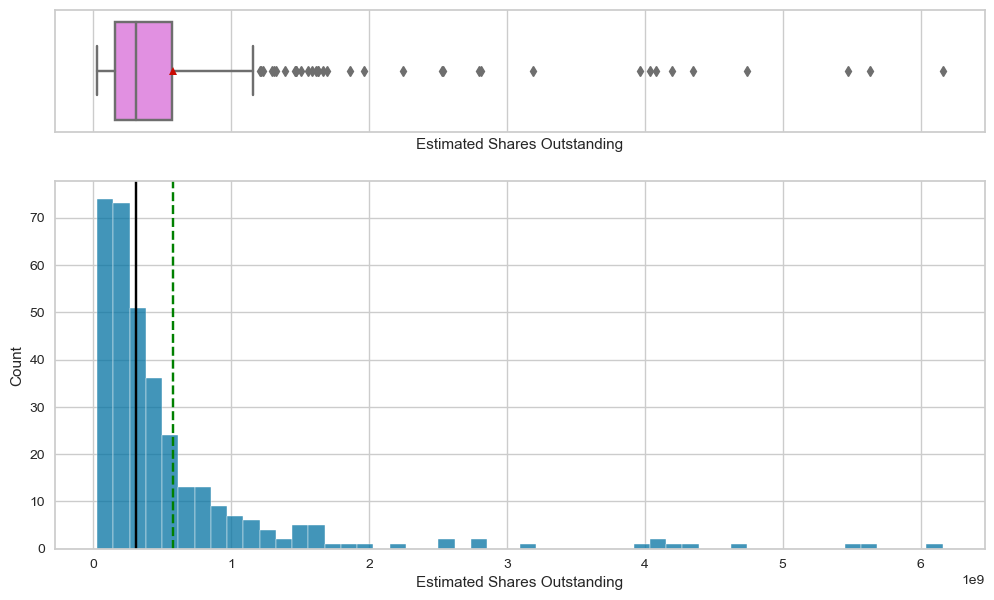

In [20]:
histogram_boxplot(df, 'Estimated Shares Outstanding')

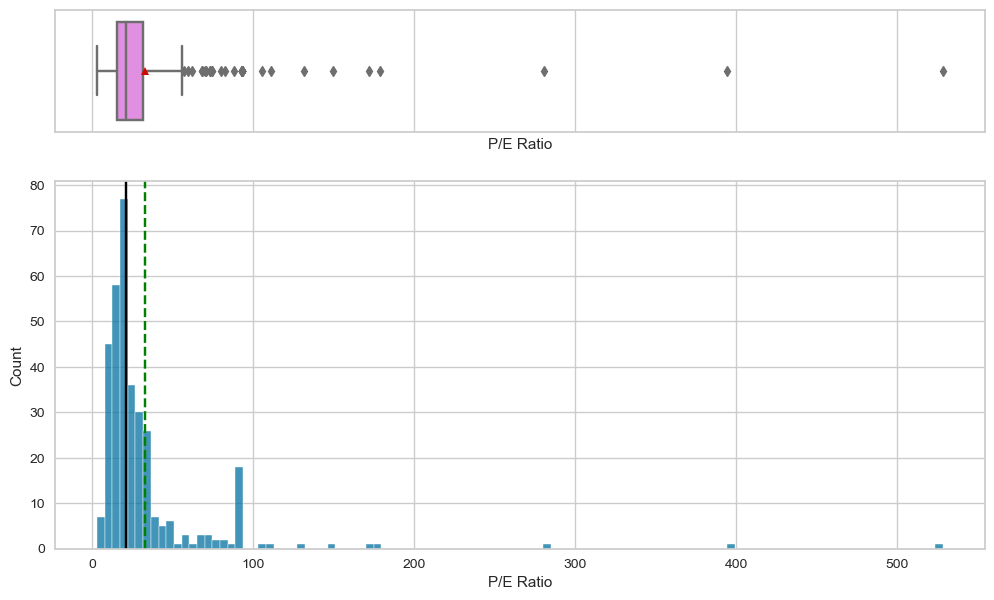

In [21]:
histogram_boxplot(df, 'P/E Ratio')

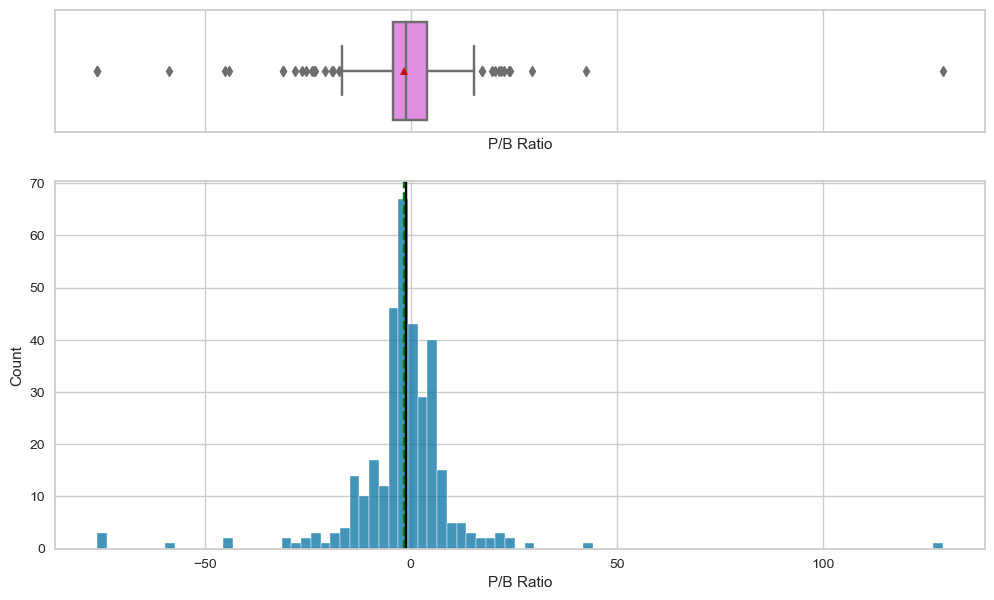

In [22]:
histogram_boxplot(df, 'P/B Ratio')

In [23]:
# function to create labeled barplots


def labeled_barplot(df, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(df[feature])  # length of the column
    count = df[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=df,
        x=feature,
        palette="Paired",
        order=df[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

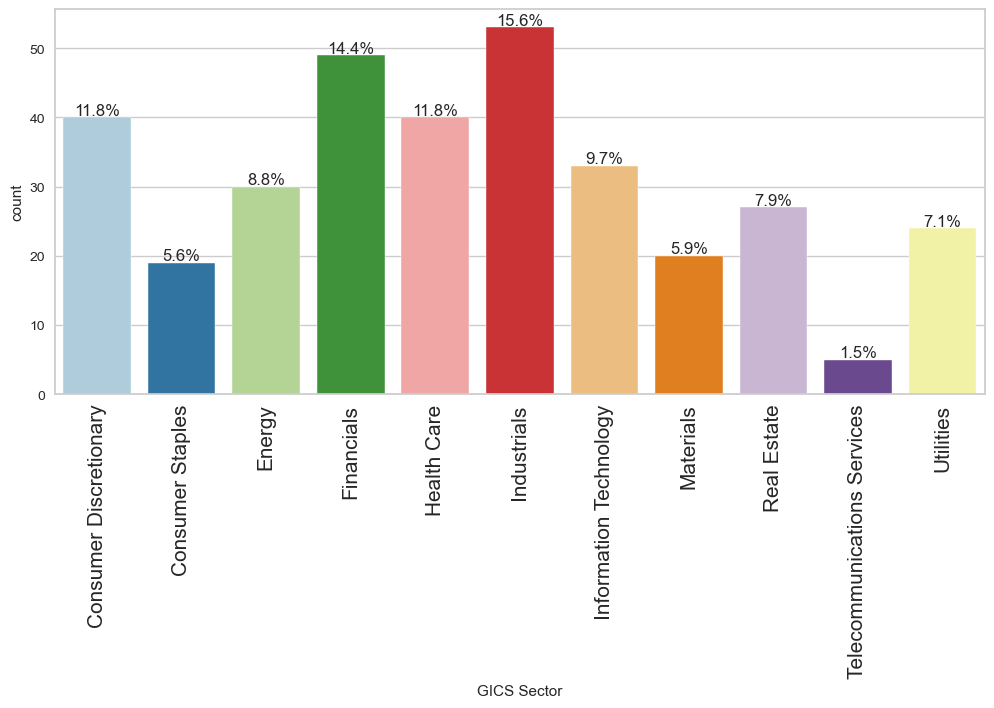

In [24]:
labeled_barplot(df, 'GICS Sector', perc=True)

#### Observations:
- Industrials are the most popular fillowed by Financials in stock.

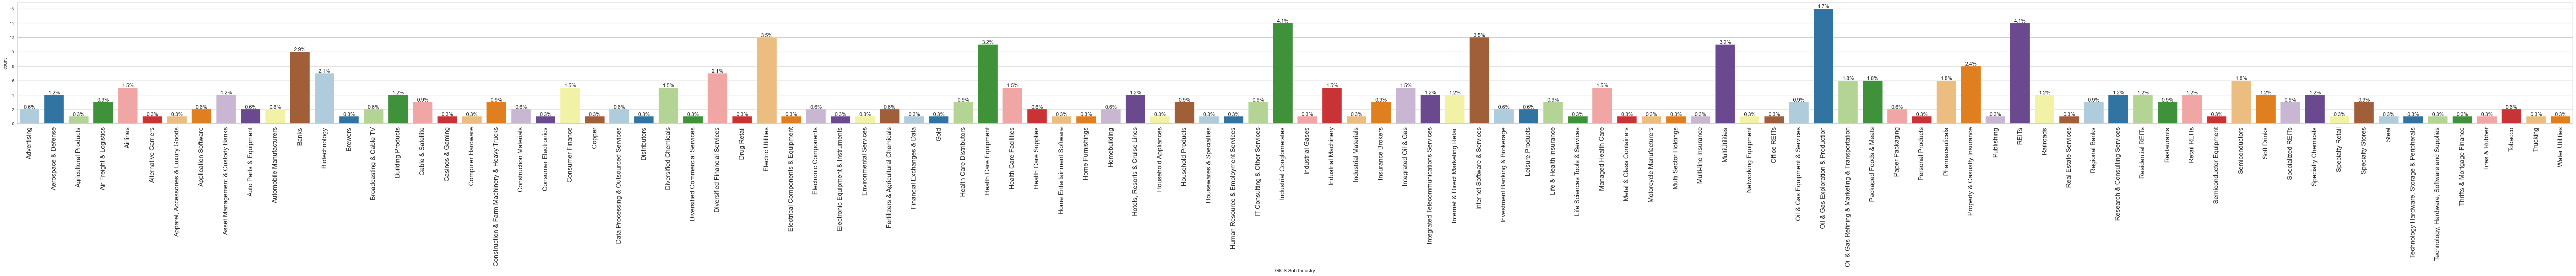

In [25]:
labeled_barplot(df, 'GICS Sub Industry', perc=True)

### Bivariate Analysis

**1. What does the distribution of stock prices look like?**

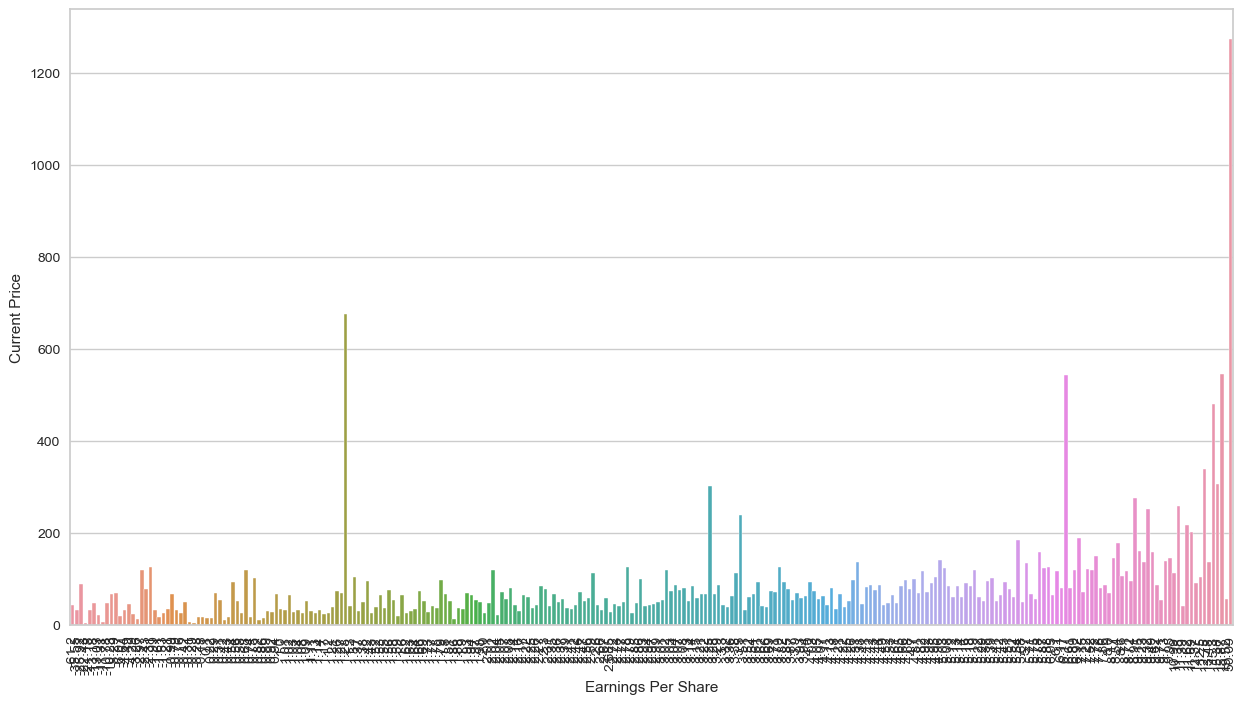

In [28]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='Earnings Per Share', y='Current Price', ci=False)  
plt.xticks(rotation=90)
plt.show()

**2. The stocks of which economic sector have seen the maximum price increase on average?**

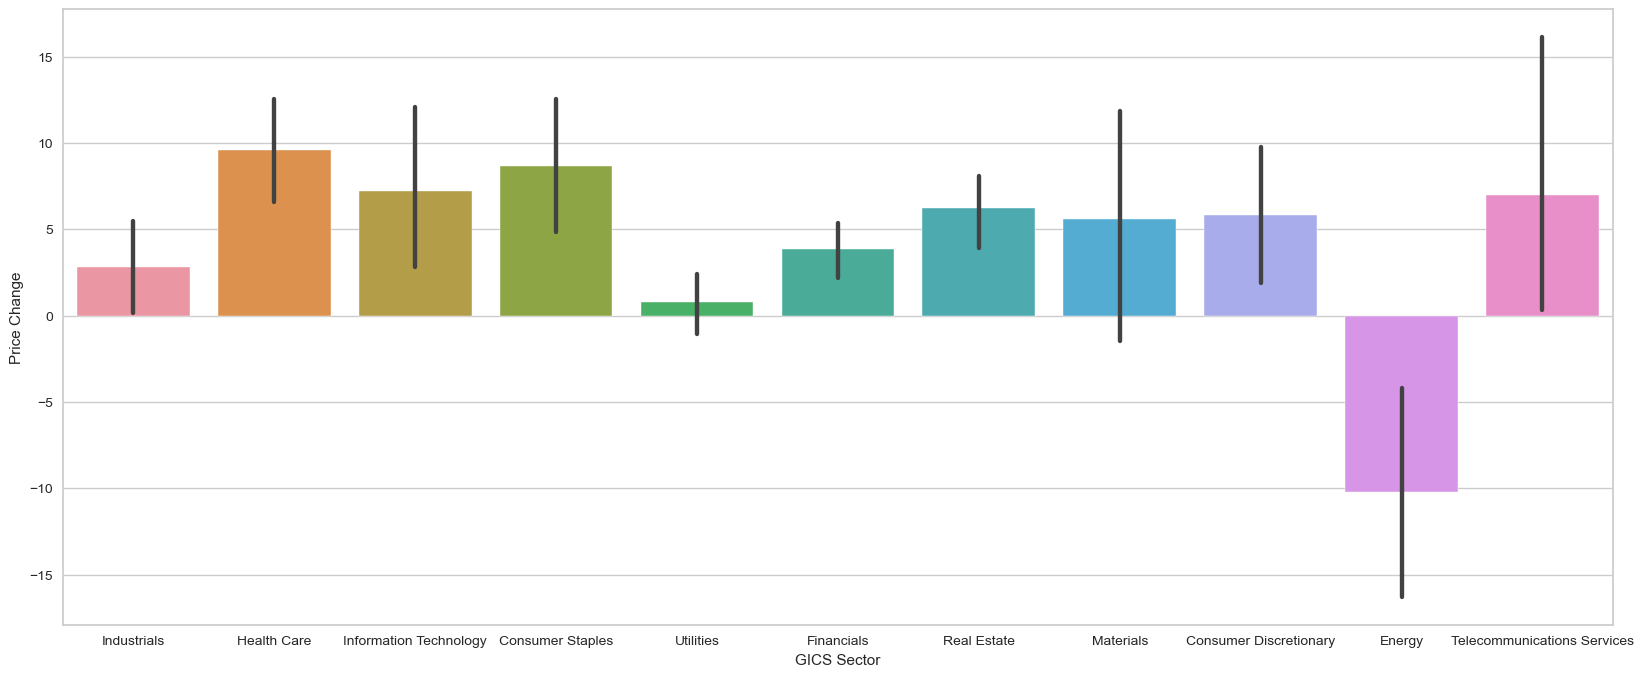

In [91]:

plt.figure(figsize=(20,8))
sns.barplot(df, x='GICS Sector', y='Price Change') 
#plt.xticks(rotation=90)
plt.show()

#### Observation:
    * Health care has maximum price increase follwed by consumer Staples.
    * Energy is negative .

**3. How are the different variables correlated with each other?**

In [70]:
num_col = ['Current Price', 'Price Change', 'Volatility', 'ROE', 'Cash Ratio', 'Net Cash Flow', 'Net Income','Earnings Per Share','Estimated Shares Outstanding', 'P/E Ratio','P/B Ratio'] 

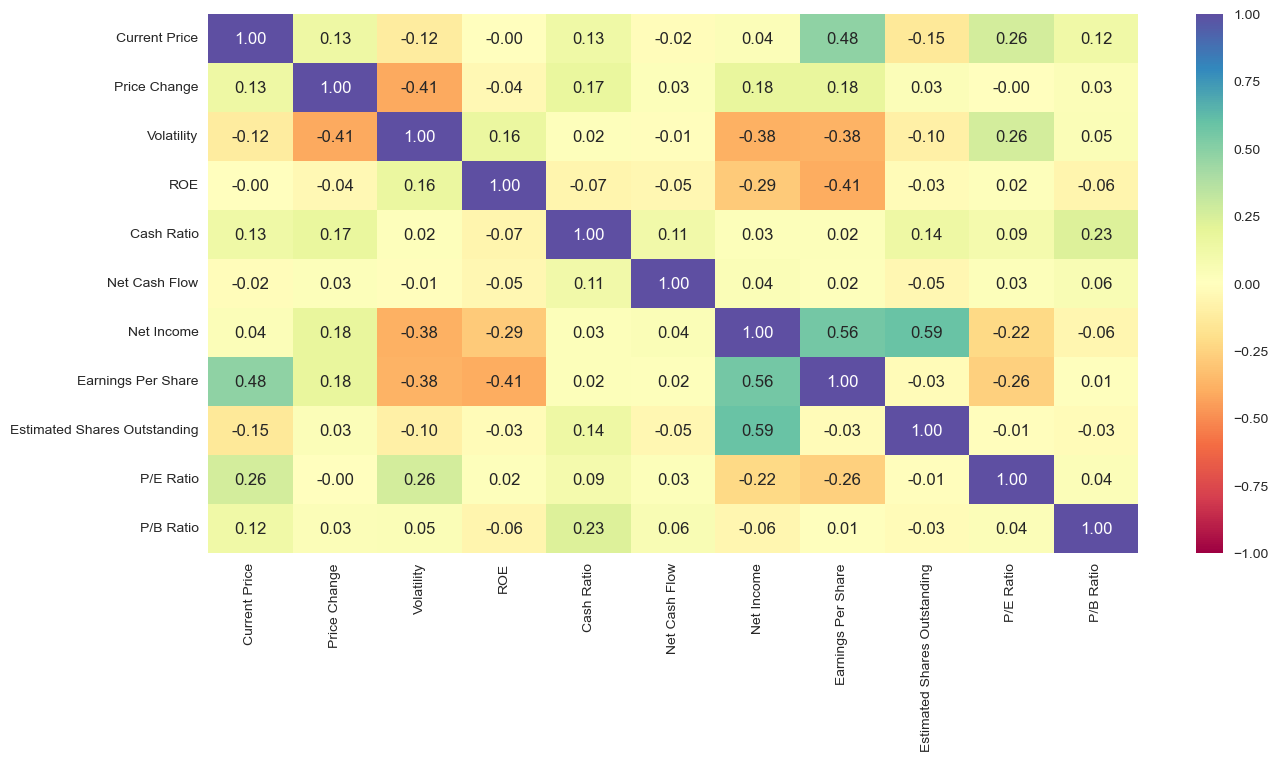

In [71]:
# correlation check
plt.figure(figsize=(15, 7))
sns.heatmap(
    df[num_col].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

#### Observations:
   * strong relationship in this data  is Estimated Share Outstanding and Net Income followed by Net income and Earnings per share.
   * Earning per share and current price is also good relationship in this data.

**4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?**

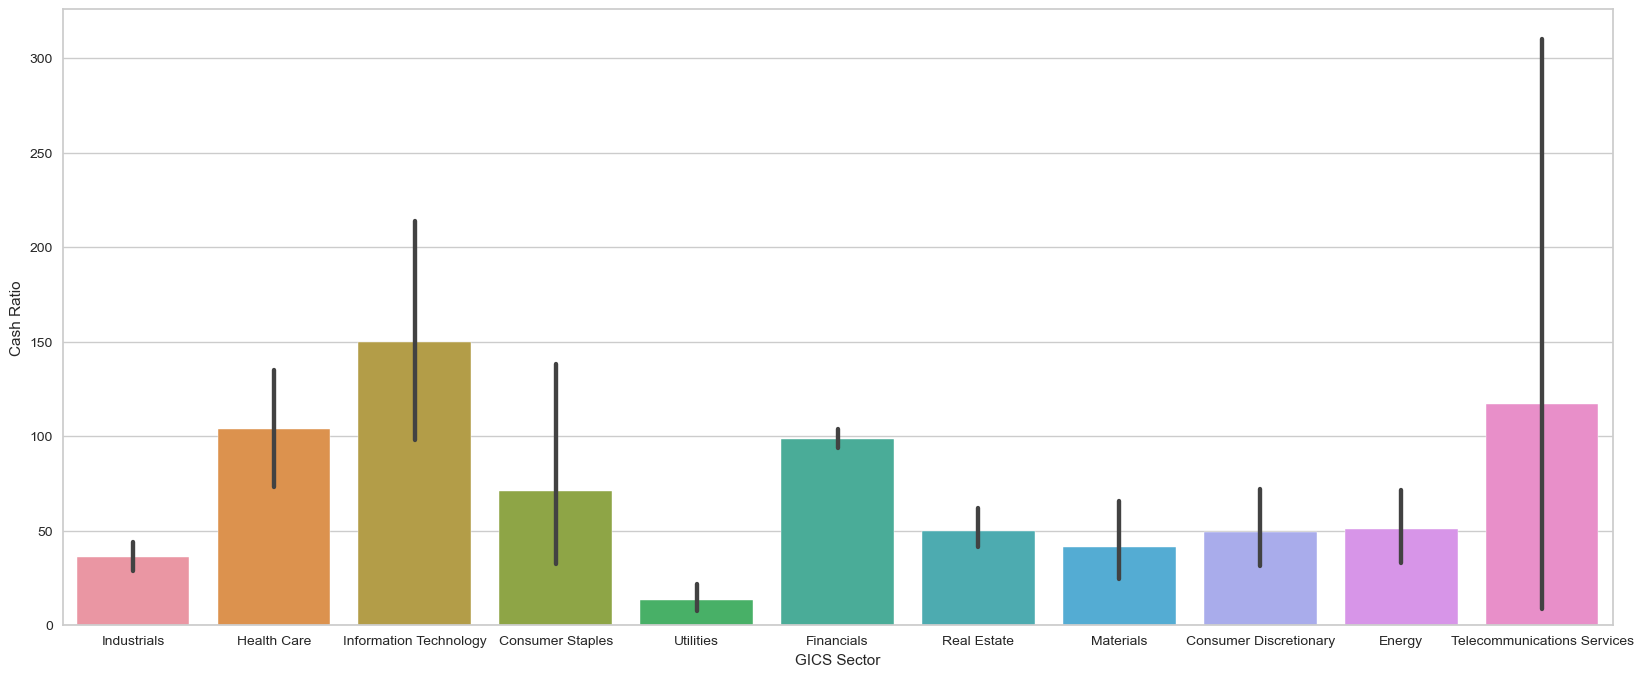

In [89]:
plt.figure(figsize=(20,8))
sns.barplot(df, x='GICS Sector', y='Cash Ratio') 
#plt.xticks(rotation=90)
plt.show()

#### Observation:
  * Information Technlogy is most high in Cash ratio vary in economic sectors .
  * Followed by Telecommunication Services and Health Care.

**5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?**

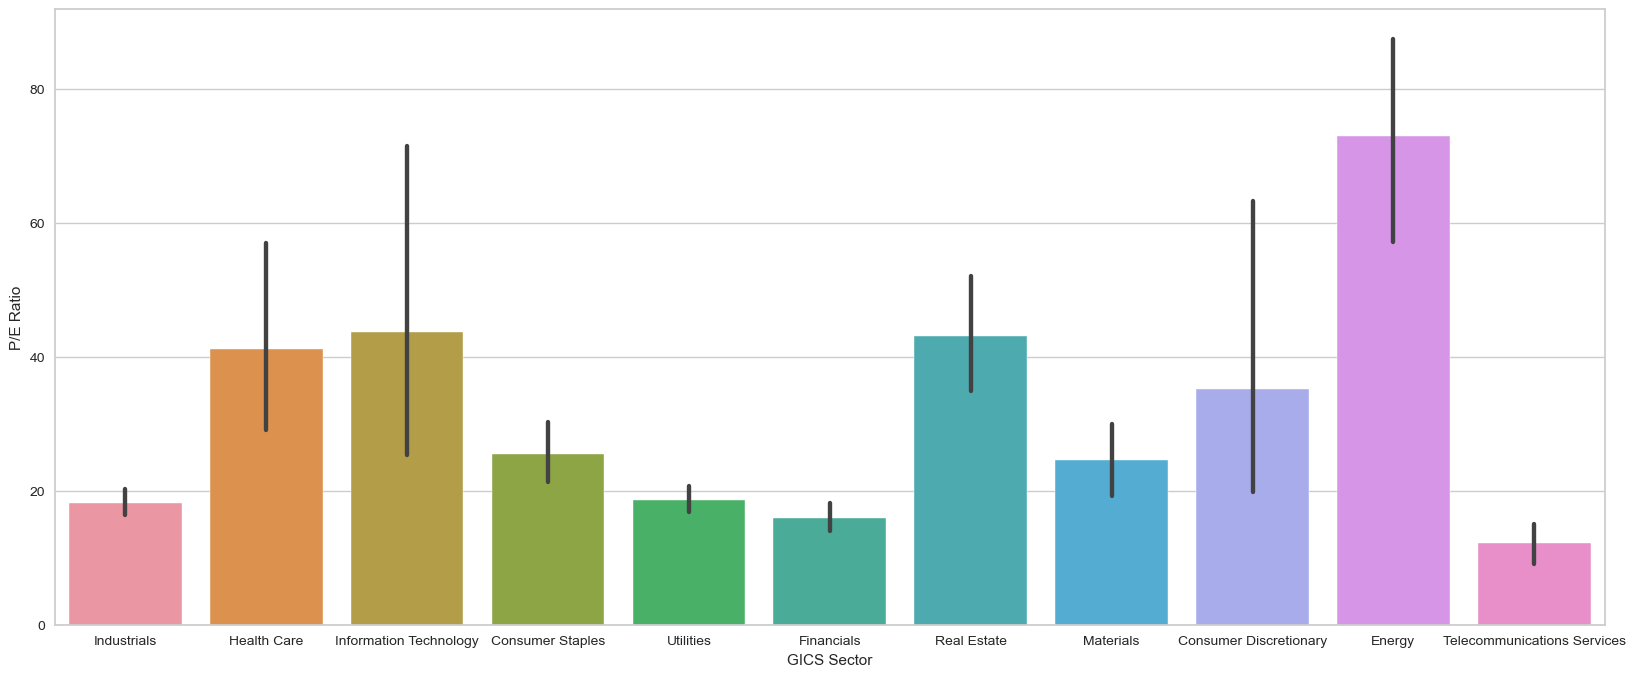

In [90]:
plt.figure(figsize=(20,8))
sns.barplot(df, x='GICS Sector', y='P/E Ratio') 
#plt.xticks(rotation=90)
plt.show()

### Observations:
   * Energy is most high in P/E ratio.
   * Followed by Information technology and Real estate investment.
   * Health care is also in third level for investment.

## Data Preprocessing

- Duplicate value check
- Missing value treatment
- Outlier check
- Feature engineering (if needed)
- Any other preprocessing steps (if needed)

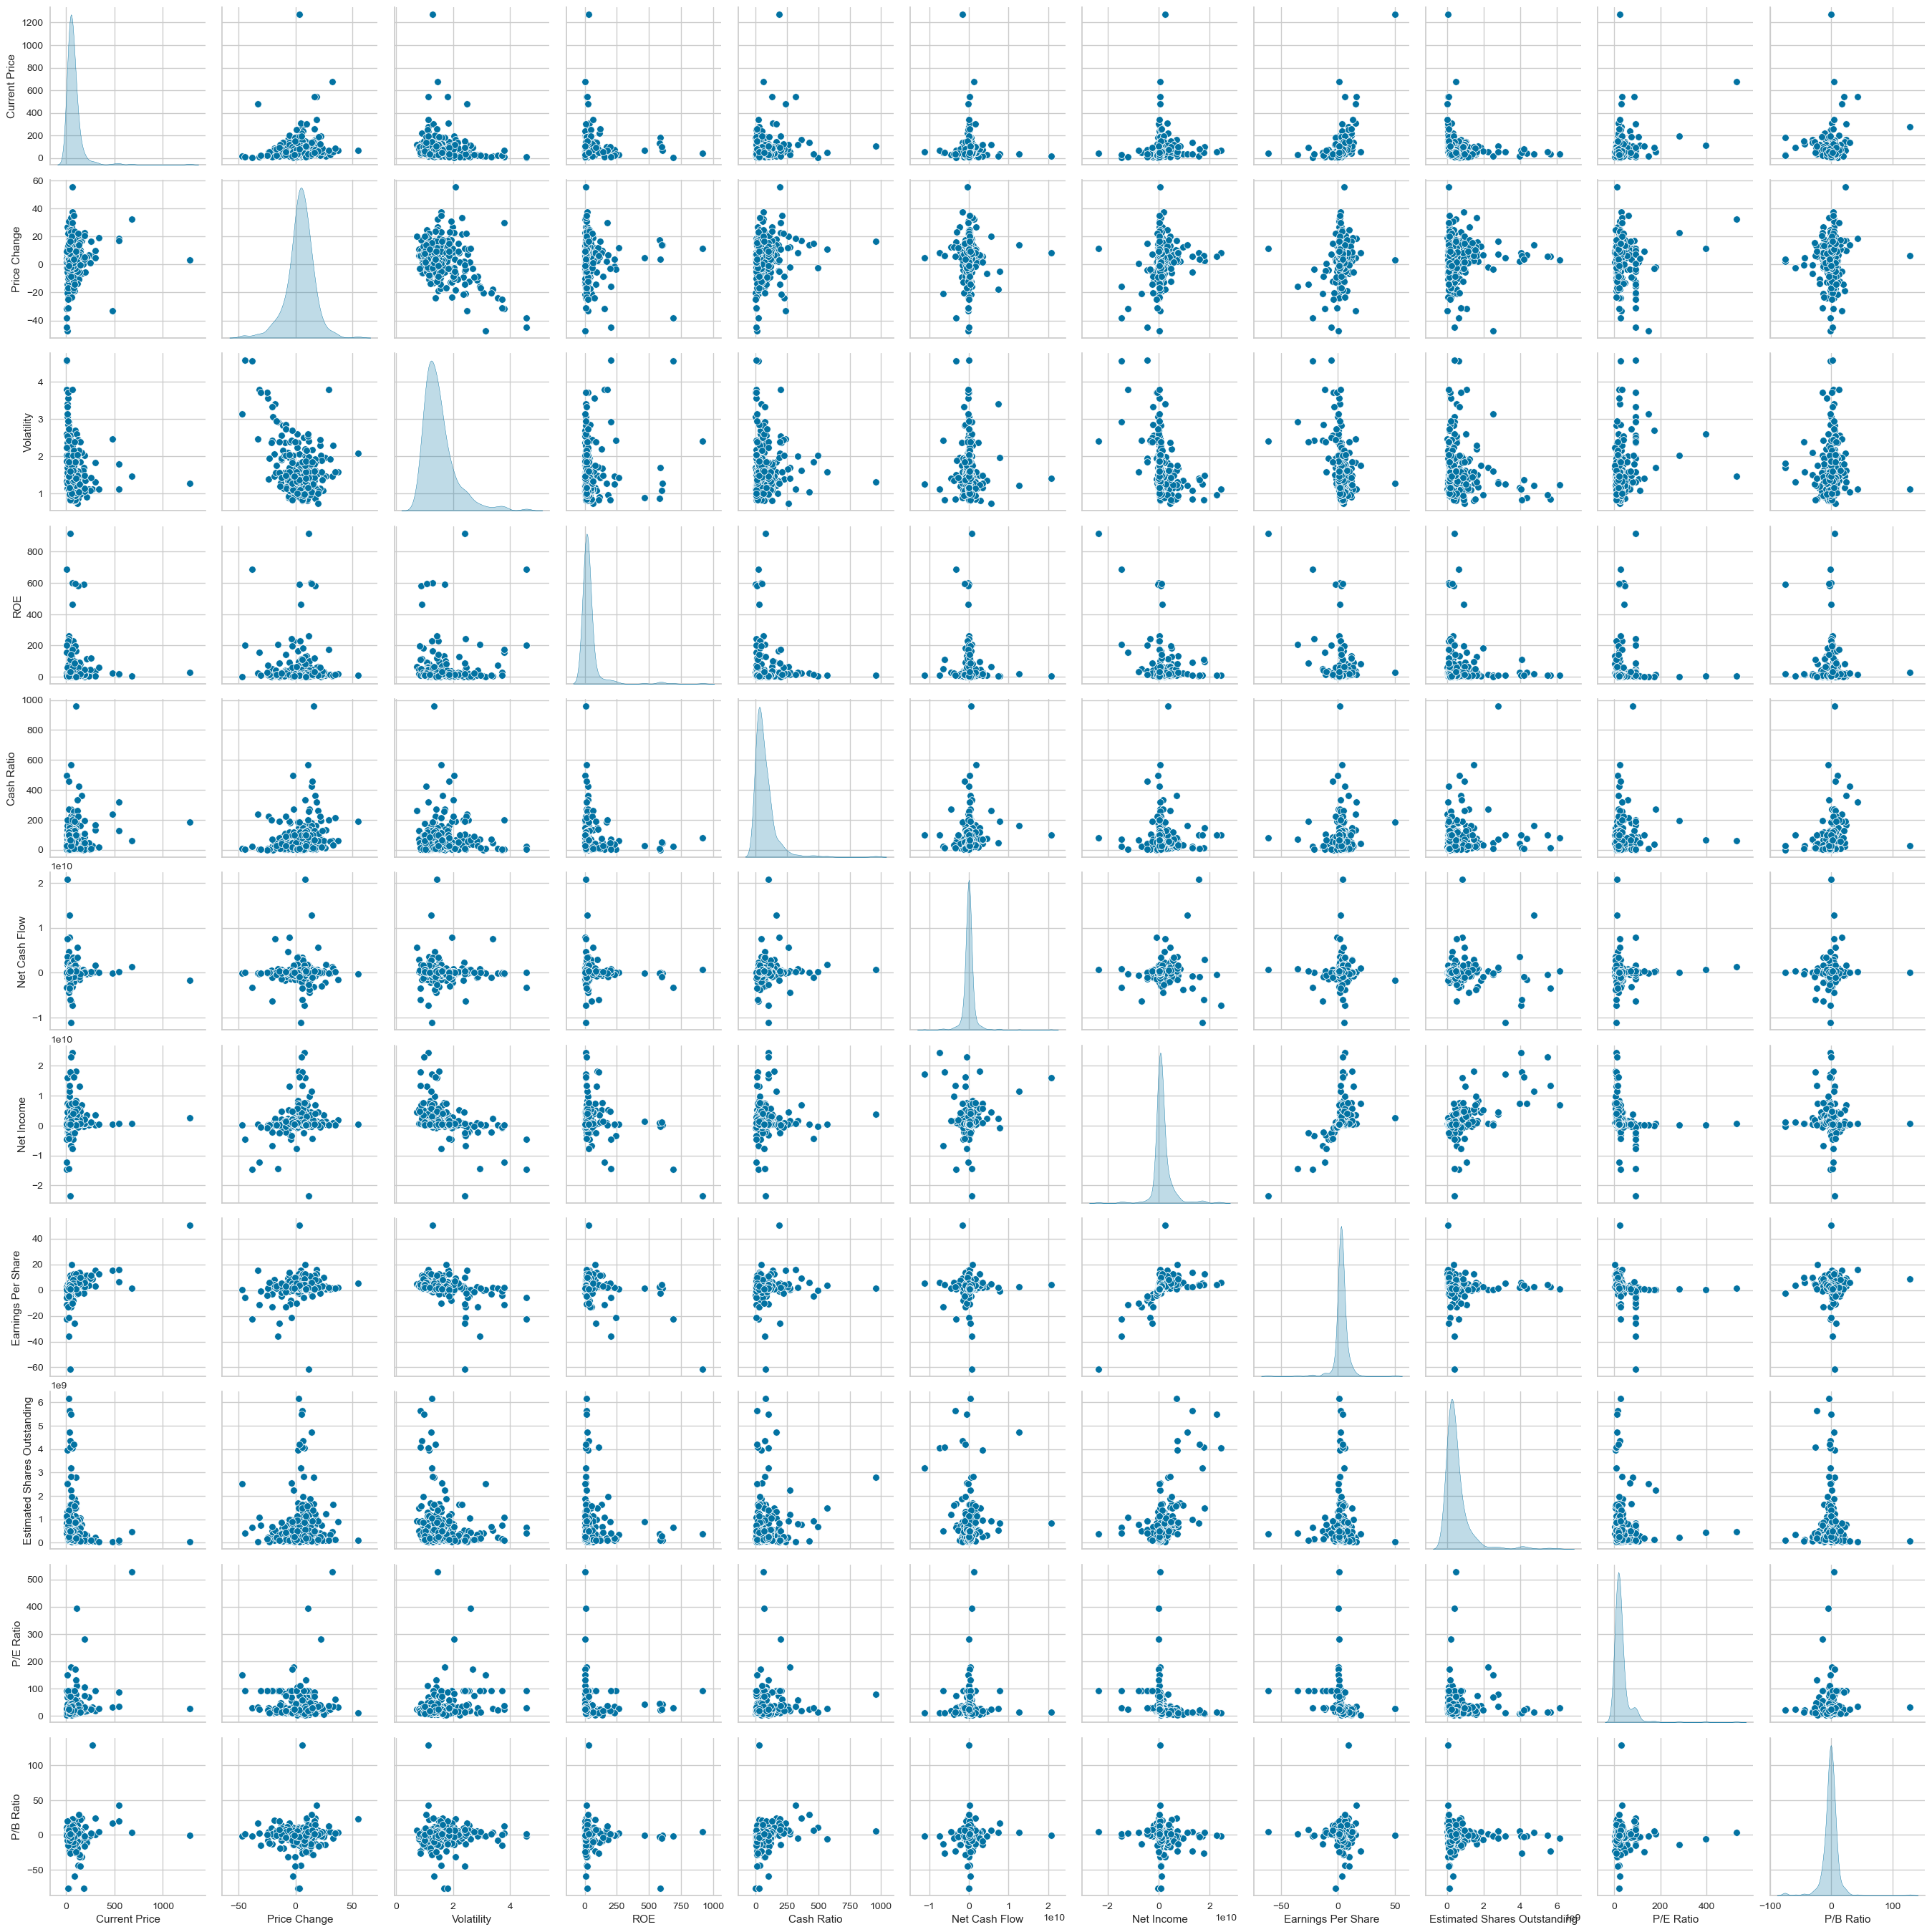

In [30]:
sns.pairplot(data=df[num_col], diag_kind="kde")
plt.show()

In [31]:
 # Scaling the data set before clustering
scaler = StandardScaler()
subset = df[num_col].copy()
subset_scaled = scaler.fit_transform(subset)  

In [32]:
 #Creating a dataframe from the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

## K-means Clustering

Number of Clusters: 1 	Average Distortion: 2.5425069919221697
Number of Clusters: 2 	Average Distortion: 2.3832204631808573
Number of Clusters: 3 	Average Distortion: 2.266134054458581
Number of Clusters: 4 	Average Distortion: 2.178151429073042
Number of Clusters: 5 	Average Distortion: 2.1225218310422096
Number of Clusters: 6 	Average Distortion: 2.052570356366889
Number of Clusters: 7 	Average Distortion: 2.0417691055838745
Number of Clusters: 8 	Average Distortion: 1.9776786324440623
Number of Clusters: 9 	Average Distortion: 1.941308387110628
Number of Clusters: 10 	Average Distortion: 1.8929103751059646
Number of Clusters: 11 	Average Distortion: 1.8092157318521074
Number of Clusters: 12 	Average Distortion: 1.8226086368566154
Number of Clusters: 13 	Average Distortion: 1.7434757429626366
Number of Clusters: 14 	Average Distortion: 1.6657820296004255


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

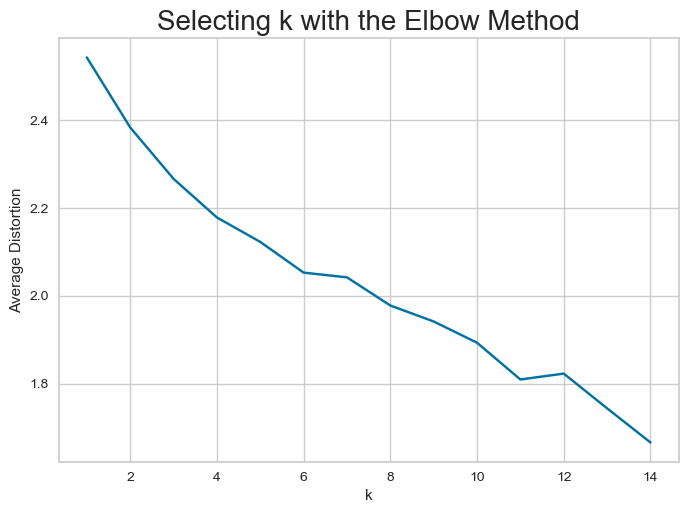

In [33]:
clusters = range(1, 15)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(subset_scaled_df)
    prediction = model.predict(subset_scaled_df)
    distortion = (
        sum(
            np.min(cdist(subset_scaled_df, model.cluster_centers_, "euclidean"), axis=1)
        )
        / subset_scaled_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)

#### Observation
* The sharpest change in slope appears around k = 6.
*  k = 6 is likely the most appropriate number of clusters for K-means clustering.

For n_clusters = 2, silhouette score is 0.43969639509980457
For n_clusters = 3, silhouette score is 0.4644405674779404
For n_clusters = 4, silhouette score is 0.4592363230636684
For n_clusters = 5, silhouette score is 0.4200700306792197
For n_clusters = 6, silhouette score is 0.3407278364144909
For n_clusters = 7, silhouette score is 0.4020029196996943
For n_clusters = 8, silhouette score is 0.365306590903461
For n_clusters = 9, silhouette score is 0.387023345347161
For n_clusters = 10, silhouette score is 0.1583824436117129
For n_clusters = 11, silhouette score is 0.1428954892042367
For n_clusters = 12, silhouette score is 0.16434245610958667
For n_clusters = 13, silhouette score is 0.1485206015176479
For n_clusters = 14, silhouette score is 0.14916816514998216


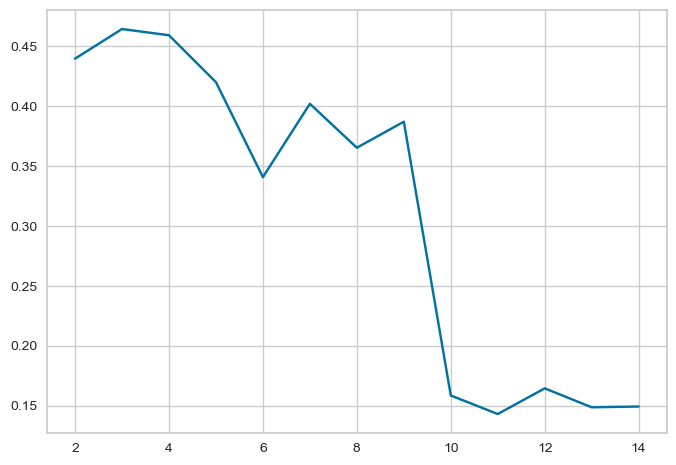

In [34]:
sil_score = []
cluster_list = list(range(2, 15))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((subset_scaled_df))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(subset_scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

plt.plot(cluster_list, sil_score)

#### observation
* The silhouette score is highest around k = 3 or k = 4.
* Based on the silhouette score plot, 3 or 4 clusters appear to be the optimal number of clusters for this dataset.

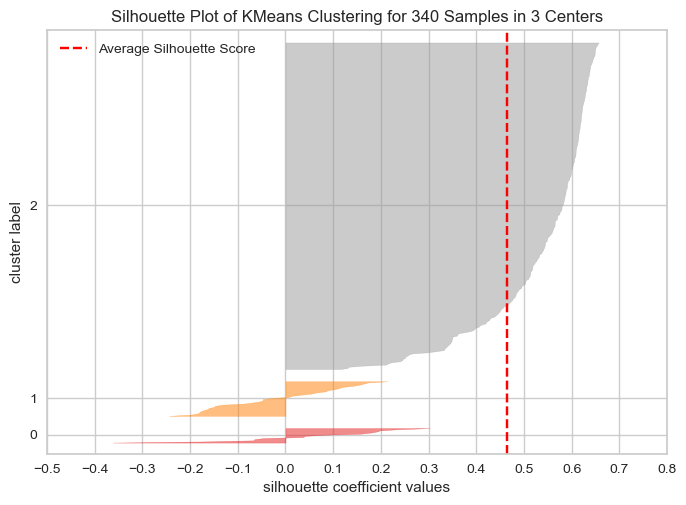

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [35]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

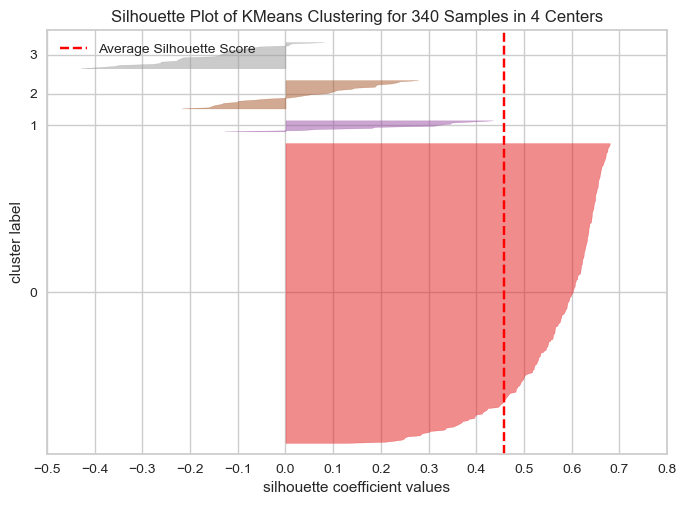

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [36]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

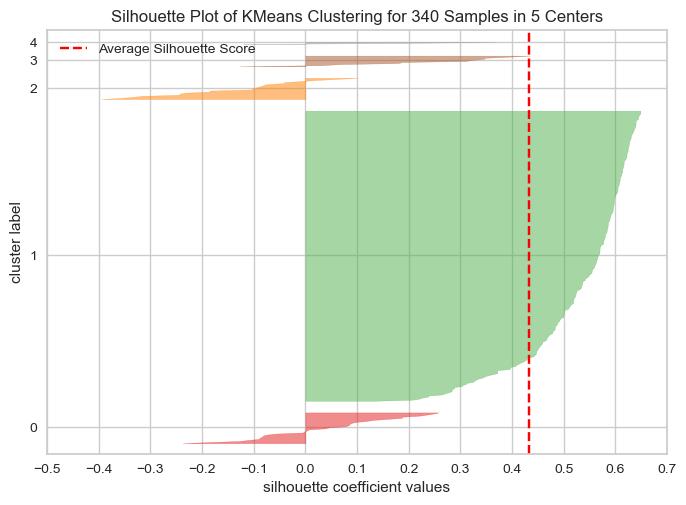

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [37]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

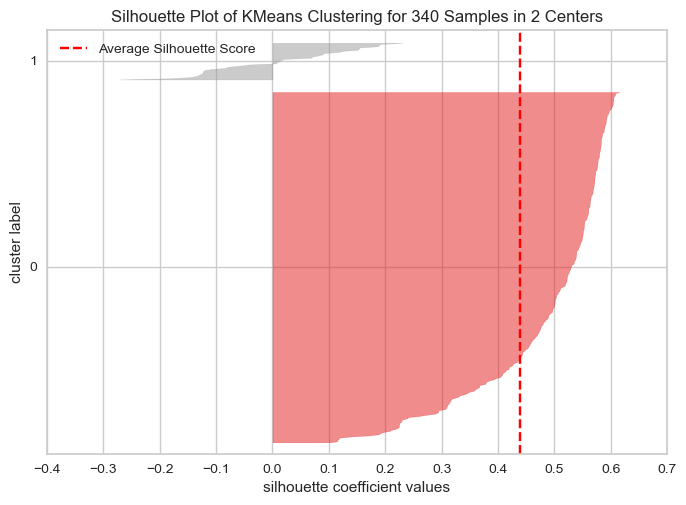

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [38]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(2, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

### Creating Final Model

In [92]:
# let's take 3 as number of clusters
kmeans = KMeans(n_clusters=6, random_state=0)
kmeans.fit(subset_scaled_df)

KMeans(n_clusters=6, random_state=0)

In [93]:
# adding kmeans cluster labels to the original dataframe
df["K_means_segments"] = kmeans.labels_

### Cluster Profiling

In [94]:
km_cluster_profile = df.groupby("K_means_segments").mean(numeric_only=True)

In [95]:
km_cluster_profile["count_in_each_segment"] = (
    df.groupby("K_means_segments")["Security"].count().values
)

In [96]:
# let's display cluster profiles
km_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
K_means_segments,,,,,,,,,,,,
0,71.950876,5.044297,1.376341,24.981273,51.393258,86249048.689139,1564498996.254682,3.698333,436647493.695543,23.420260,-3.270855,267
1,50.517273,5.747586,1.130399,31.090909,75.909091,-1072272727.272727,14833090909.090910,4.154545,4298826628.727273,14.803577,-4.552119,11
2,26.990000,-14.060688,3.296307,603.000000,57.333333,-585000000.000000,-17555666666.666668,-39.726667,481910081.666667,71.528835,1.638633,3
3,108.304002,10.737770,1.165694,566.200000,26.600000,-278760000.000000,687180000.000000,1.548000,349607057.720000,34.898915,-16.851358,5
4,214.537220,12.970653,1.770434,28.833333,291.041667,206160166.666667,1115363083.333333,6.433333,532903567.855000,36.603080,15.658454,24
5,65.174668,-11.542247,2.690220,37.300000,65.366667,195008366.666667,-1677736033.333333,-4.401667,544473664.718000,113.488924,1.424161,30


In [97]:
## code to print the companies in each cluster
for cl in df["GICS Sector"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df[df["GICS Sector"] == cl]["Security"].unique())
    print()

In cluster Industrials, the following companies are present:
['American Airlines Group' 'Alaska Air Group Inc' 'Allegion' 'AMETEK Inc'
 'Arconic Inc' 'Boeing Company' 'Caterpillar Inc.'
 'C. H. Robinson Worldwide' 'Cummins Inc.' 'CSX Corp.' 'Delta Air Lines'
 'Deere & Co.' 'Danaher Corp.' 'Dun & Bradstreet' 'Dover Corp.'
 'Equifax Inc.' 'Eaton Corporation' "Expeditors Int'l" 'Fastenal Co'
 'Fortune Brands Home & Security' 'Fluor Corp.' 'Flowserve Corporation'
 'General Dynamics' 'Grainger (W.W.) Inc.' "Honeywell Int'l Inc."
 'Illinois Tool Works' 'J. B. Hunt Transport Services'
 'Jacobs Engineering Group' 'Kansas City Southern' 'Leggett & Platt'
 'L-3 Communications Holdings' 'Lockheed Martin Corp.'
 'Southwest Airlines' 'Masco Corp.' '3M Company' 'Nielsen Holdings'
 'Norfolk Southern Corp.' 'Pitney-Bowes' 'PACCAR Inc.' 'Pentair Ltd.'
 'Quanta Services Inc.' 'Ryder System' 'Robert Half International'
 'Roper Industries' 'Republic Services Inc' 'Stericycle Inc'
 'United Continental Hold

In [98]:
df.groupby(["K_means_segments", "GICS Sector"])['Security'].count()

K_means_segments  GICS Sector                
0                 Consumer Discretionary         32
                  Consumer Staples               15
                  Energy                          5
                  Financials                     45
                  Health Care                    29
                  Industrials                    51
                  Information Technology         21
                  Materials                      17
                  Real Estate                    26
                  Telecommunications Services     2
                  Utilities                      24
1                 Consumer Discretionary          1
                  Consumer Staples                1
                  Energy                          1
                  Financials                      3
                  Health Care                     2
                  Information Technology          1
                  Telecommunications Services     2
2                 

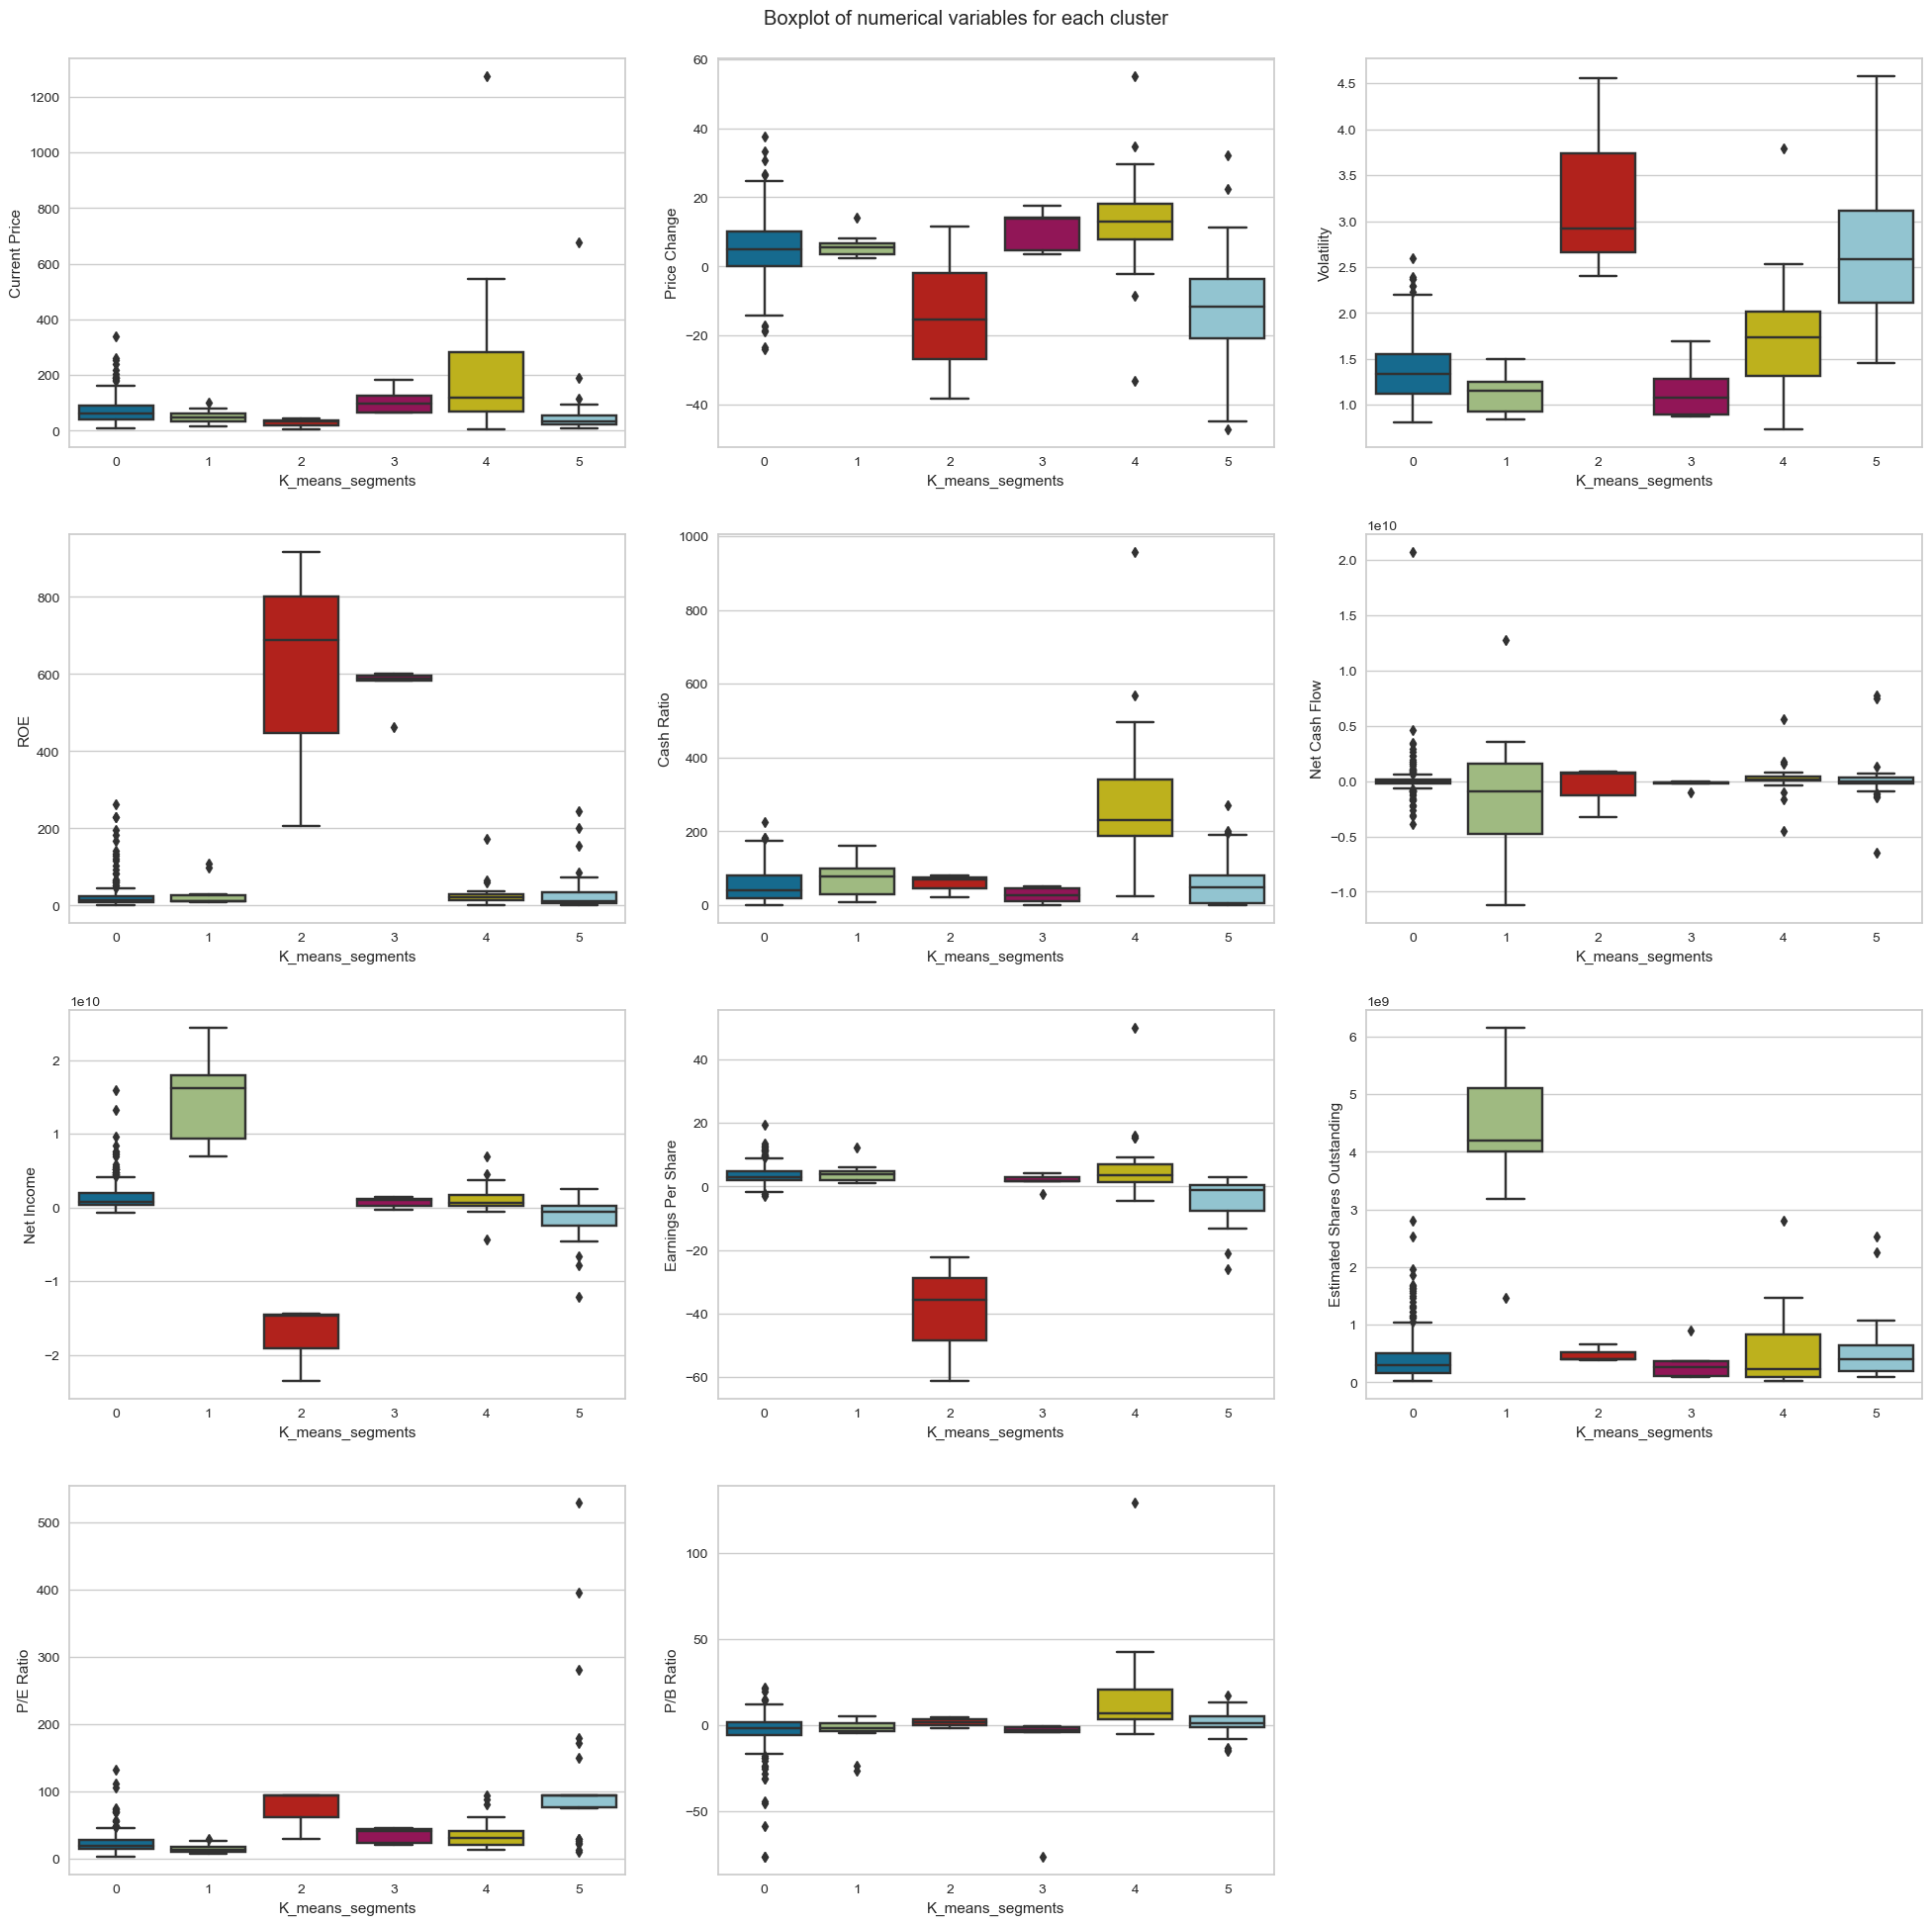

In [102]:
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

for i, variable in enumerate(num_col):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=df, x="K_means_segments", y=variable)

plt.tight_layout(pad=2.0)

<Axes: xlabel='K_means_segments'>

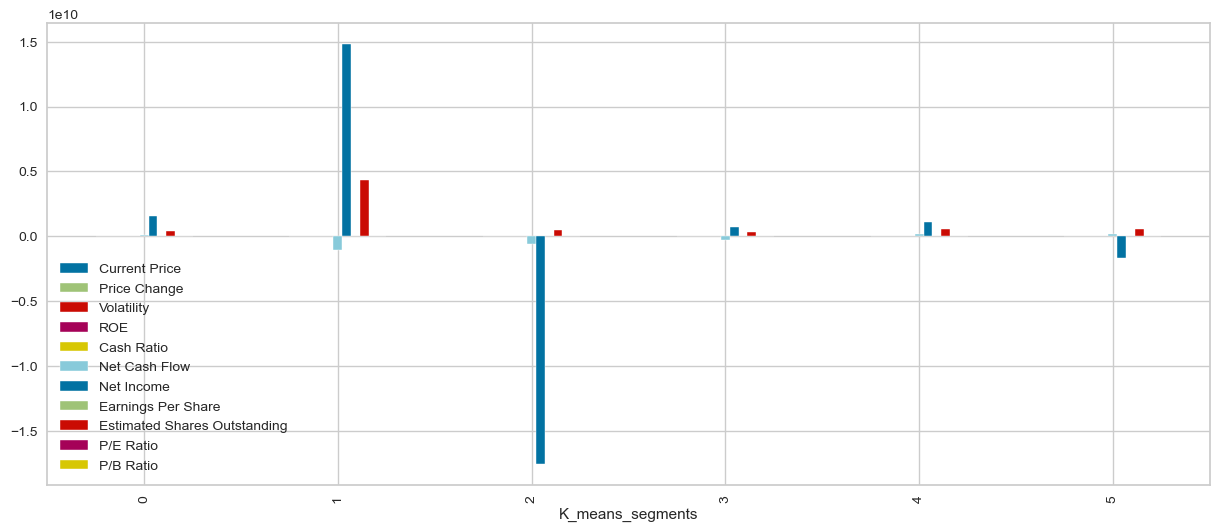

In [100]:
df.groupby("K_means_segments").mean(numeric_only=True).plot.bar(figsize=(15, 6))

### Insights

 **Cluster 0**:
   - This cluster consists of relatively stable, profitable companies with strong liquidity, modest growth, and a healthy ROE.    - These companies are likely to be safe investments with moderate returns.

 **Cluster 1**:
 - This cluster includes companies with high profitability and ROE, indicating strong performance, but with negative cash flow,    possibly due to high investment or debt repayment. 
 - Despite the negative P/B ratio, these companies appear undervalued based on the P/E ratio.

 **Cluster 2**:
 - This cluster consists of highly volatile companies with substantial losses and negative earnings, but with an unusually high    ROE, which may be skewed by negative equity. 
 - These companies are likely high-risk with potential for turnaround or further decline.

 **Cluster 3**:
 - Companies in this cluster have high stock prices and strong price growth. Despite their high ROE, they are carrying           significant negative cash flow and a negative P/B ratio, which may indicate high leverage or financial distress. 
 - They appear overvalued but could offer high returns.

 **Cluster 4**:
 - This cluster represents high-growth, high-value companies with significant cash reserves and strong profitability. 
  - Despite being overvalued based on the P/E ratio, these companies are likely strong performers with potential for sustained growth.

 **Cluster 5**:
 - This cluster includes companies that have experienced recent declines in stock price and high volatility. Despite a moderate ROE and positive cash flow, they are operating at a loss with a high P/E ratio, indicating they may be overvalued or speculative investments.

## Hierarchical Clustering

### Checking Cophenetic Correlation

In [48]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.9232271494002922.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7873280186580672.
Cophenetic correlation for Euclidean distance and average linkage is 0.9422540609560814.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8693784298129404.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9062538164750717.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.598891419111242.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9338265528030499.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9127355892367.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.9259195530524591.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.7925307202850002.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9247324030159737.
Cophenetic correl

In [49]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9422540609560814, which is obtained with Euclidean distance and average linkage.


**Let's explore different linkage methods with Euclidean distance only.**

In [50]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(subset_scaled_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.9232271494002922.
Cophenetic correlation for complete linkage is 0.7873280186580672.
Cophenetic correlation for average linkage is 0.9422540609560814.
Cophenetic correlation for centroid linkage is 0.9314012446828154.
Cophenetic correlation for ward linkage is 0.7101180299865353.
Cophenetic correlation for weighted linkage is 0.8693784298129404.


In [51]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9422540609560814, which is obtained with average linkage.


**We see that the cophenetic correlation is maximum with Euclidean distance and average linkage.**

### Checking Dendrograms

**Let's see the dendrograms for the different linkage methods.**

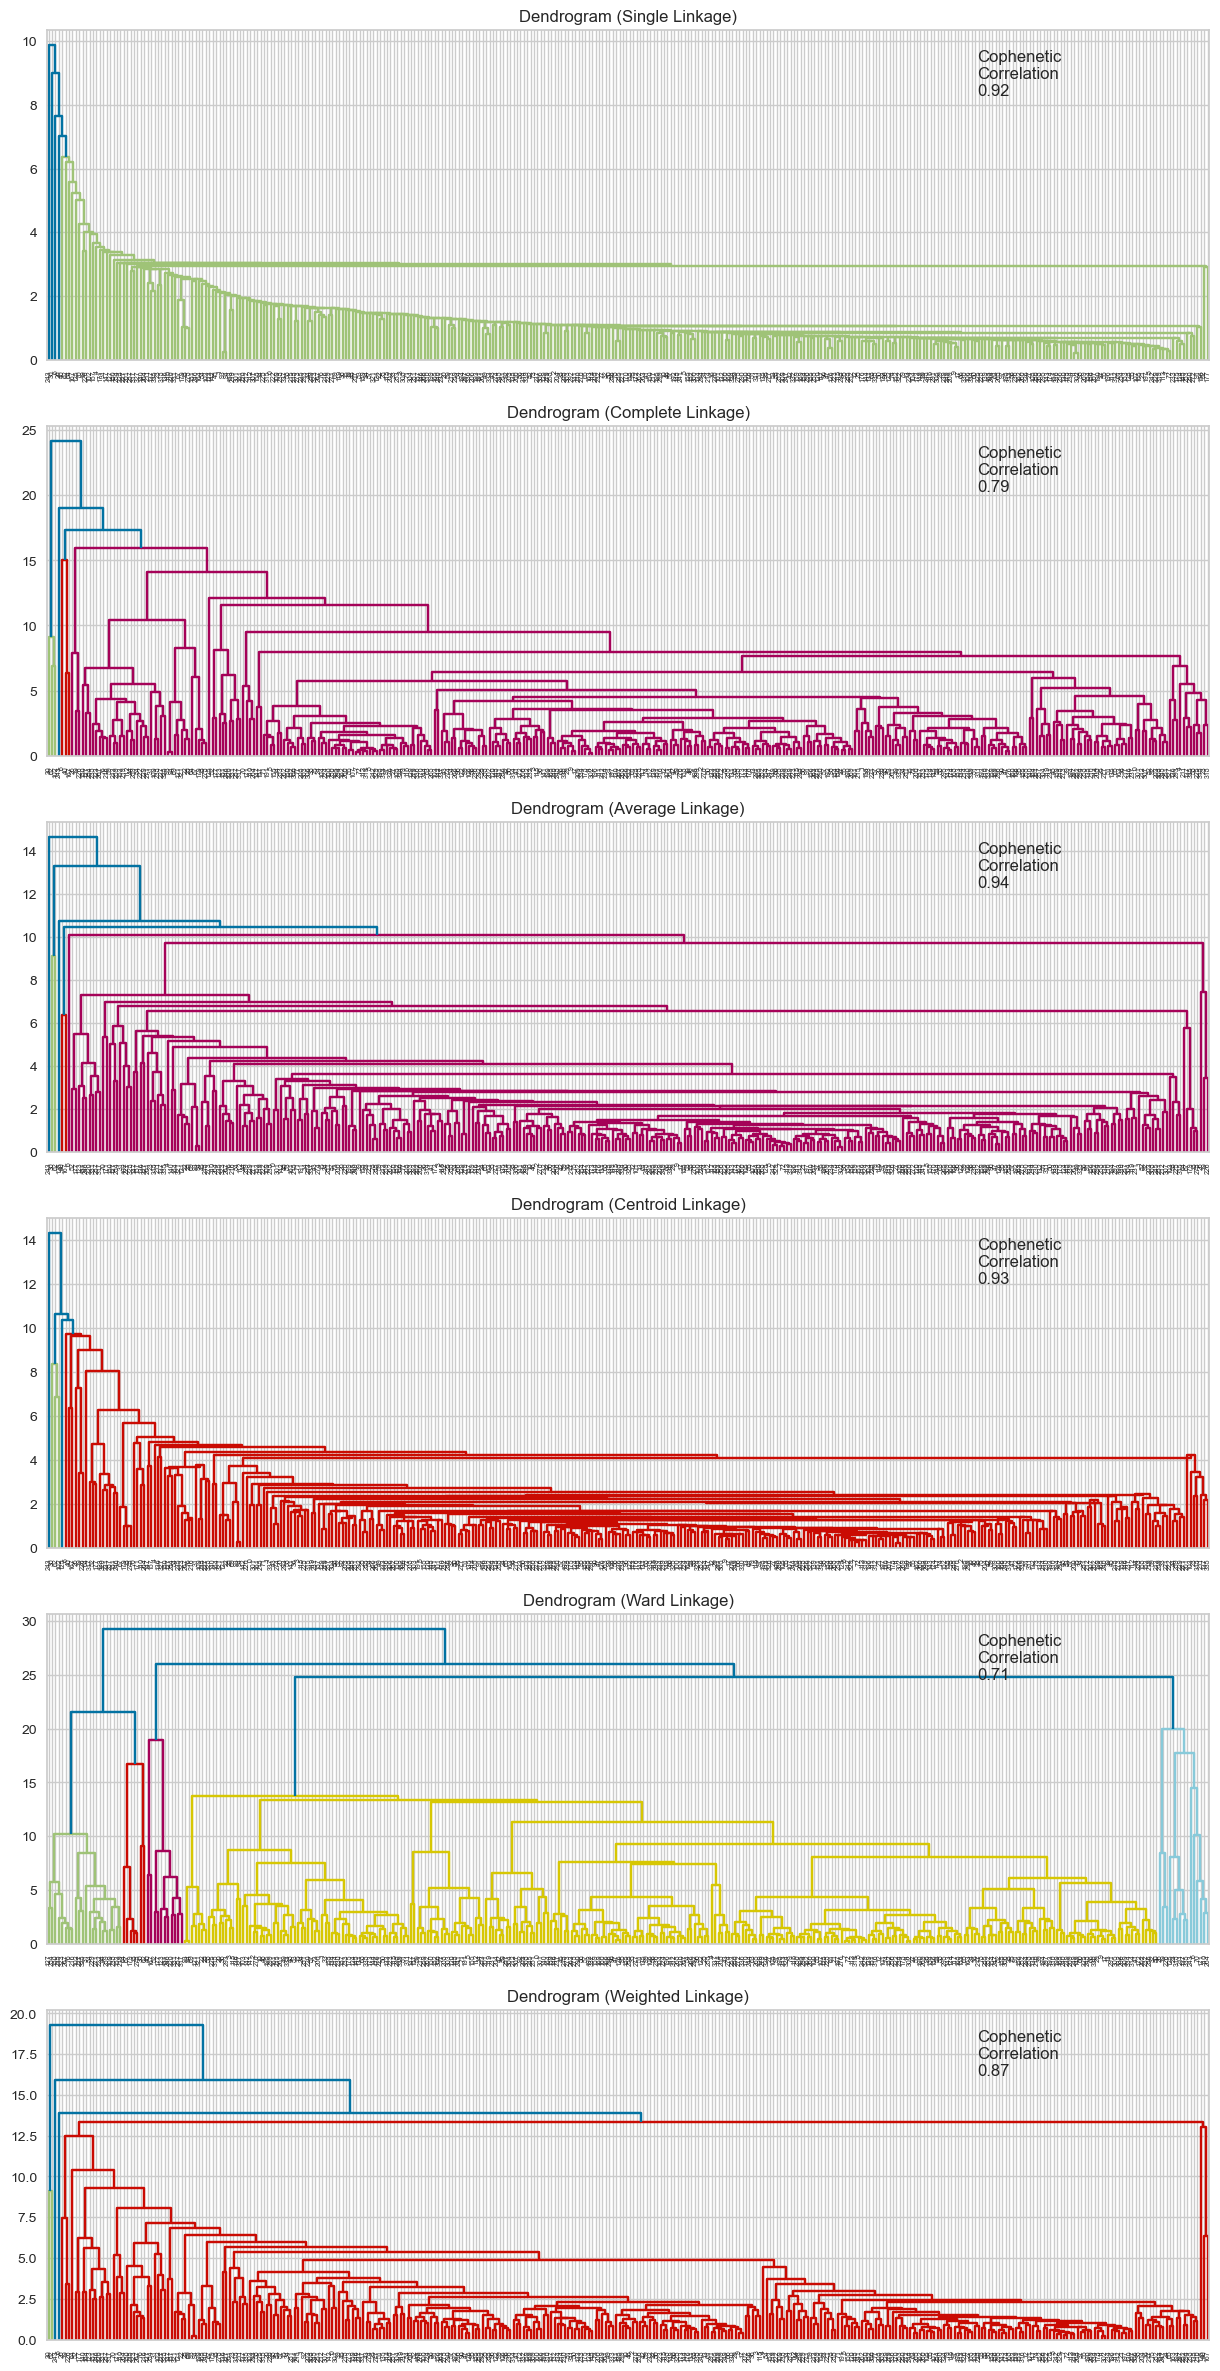

In [52]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare =[]
# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(subset_scaled_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

### Creating Model using sklearn

In [78]:
HCmodel = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="average")
HCmodel.fit(subset_scaled_df)

AgglomerativeClustering(affinity='euclidean', linkage='average', n_clusters=3)

In [55]:
df1= data.copy()

In [79]:
subset_scaled_df["HC_Clusters"] = HCmodel.labels_
df1["HC_Clusters"] = HCmodel.labels_

### Cluster Profiling

In [80]:
cluster_profile = df1.groupby("HC_Clusters").mean(numeric_only=True)

In [81]:
cluster_profile["count_in_each_segments"] = (
    df1.groupby("HC_Clusters")["Security"].count().values
)

In [82]:
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segments
HC_Clusters,,,,,,,,,,,,
0,77.653642,4.184271,1.515129,35.103858,69.798220,68662246.290801,1613508620.178041,2.900905,578930419.447478,32.466828,-1.739711,337
1,1274.949951,3.190527,1.268340,29.000000,184.000000,-1671386000.000000,2551360000.000000,50.090000,50935516.070000,25.453183,-1.052429,1
2,24.485001,-13.351992,3.482611,802.000000,51.000000,-1292500000.000000,-19106500000.000000,-41.815000,519573983.250000,60.748608,1.565141,2


### Insights

**HC_Cluster 0:**
- This cluster represents stable, profitable companies with strong liquidity and moderate growth. They are generally safe investments, offering steady returns with limited risk. 
- These companies are well-positioned for long-term stability and moderate appreciation.



**HC_Cluster 1:**
- This cluster contains a single, high-value, highly stable company with significant liquidity and profitability. Despite the negative cash flow, likely due to large investments or debt, this company is a strong performer with a solid earnings base.   -- It's a high-value, low-risk investment, suitable for long-term investors seeking stability in a well-capitalized company.

**HC_Cluster 2:**
- This cluster includes highly volatile companies experiencing significant financial difficulties, with large losses and negative earnings. The extremely high ROE is likely misleading, due to negative equity, and the high P/E ratio suggests these companies are overvalued. 
- These are high-risk, speculative investments, potentially suitable for investors looking for turnaround opportunities, but they carry significant downside risk.

In [83]:
# let's see the names of the countries in each cluster
for cl in df1["HC_Clusters"].unique():
    print("In cluster {}, the following countries are present:".format(cl))
    print(df1[df1["HC_Clusters"] == cl]["Security"].unique())
    print()

In cluster 0, the following countries are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Analog Devices, Inc.' 'Archer-Daniels-Midland Co'
 'Alliance Data Systems' 'Ameren Corp' 'American Electric Power'
 'AFLAC Inc' 'American International Group, Inc.'
 'Apartment Investment & Mgmt' 'Assurant Inc' 'Arthur J. Gallagher & Co.'
 'Akamai Technologies Inc' 'Albemarle Corp' 'Alaska Air Group Inc'
 'Allstate Corp' 'Allegion' 'Alexion Pharmaceuticals'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Amgen Inc' 'Ameriprise Financial' 'American Tower Corp A'
 'Amazon.com Inc' 'AutoNation Inc' 'Anthem Inc.' 'Aon plc'
 'Anadarko Petroleum Corp' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Bank of America Corp' 'Baxter International Inc.' 'BB&T Corporation'
 'Bard (C.R.) Inc.' 'Baker Hughes Inc' 'BIOGEN IDEC I

In [84]:
df1.groupby(["HC_Clusters", "GICS Sector"])['Security'].count()

HC_Clusters  GICS Sector                
0            Consumer Discretionary         39
             Consumer Staples               19
             Energy                         28
             Financials                     49
             Health Care                    40
             Industrials                    53
             Information Technology         33
             Materials                      20
             Real Estate                    27
             Telecommunications Services     5
             Utilities                      24
1            Consumer Discretionary          1
2            Energy                          2
Name: Security, dtype: int64

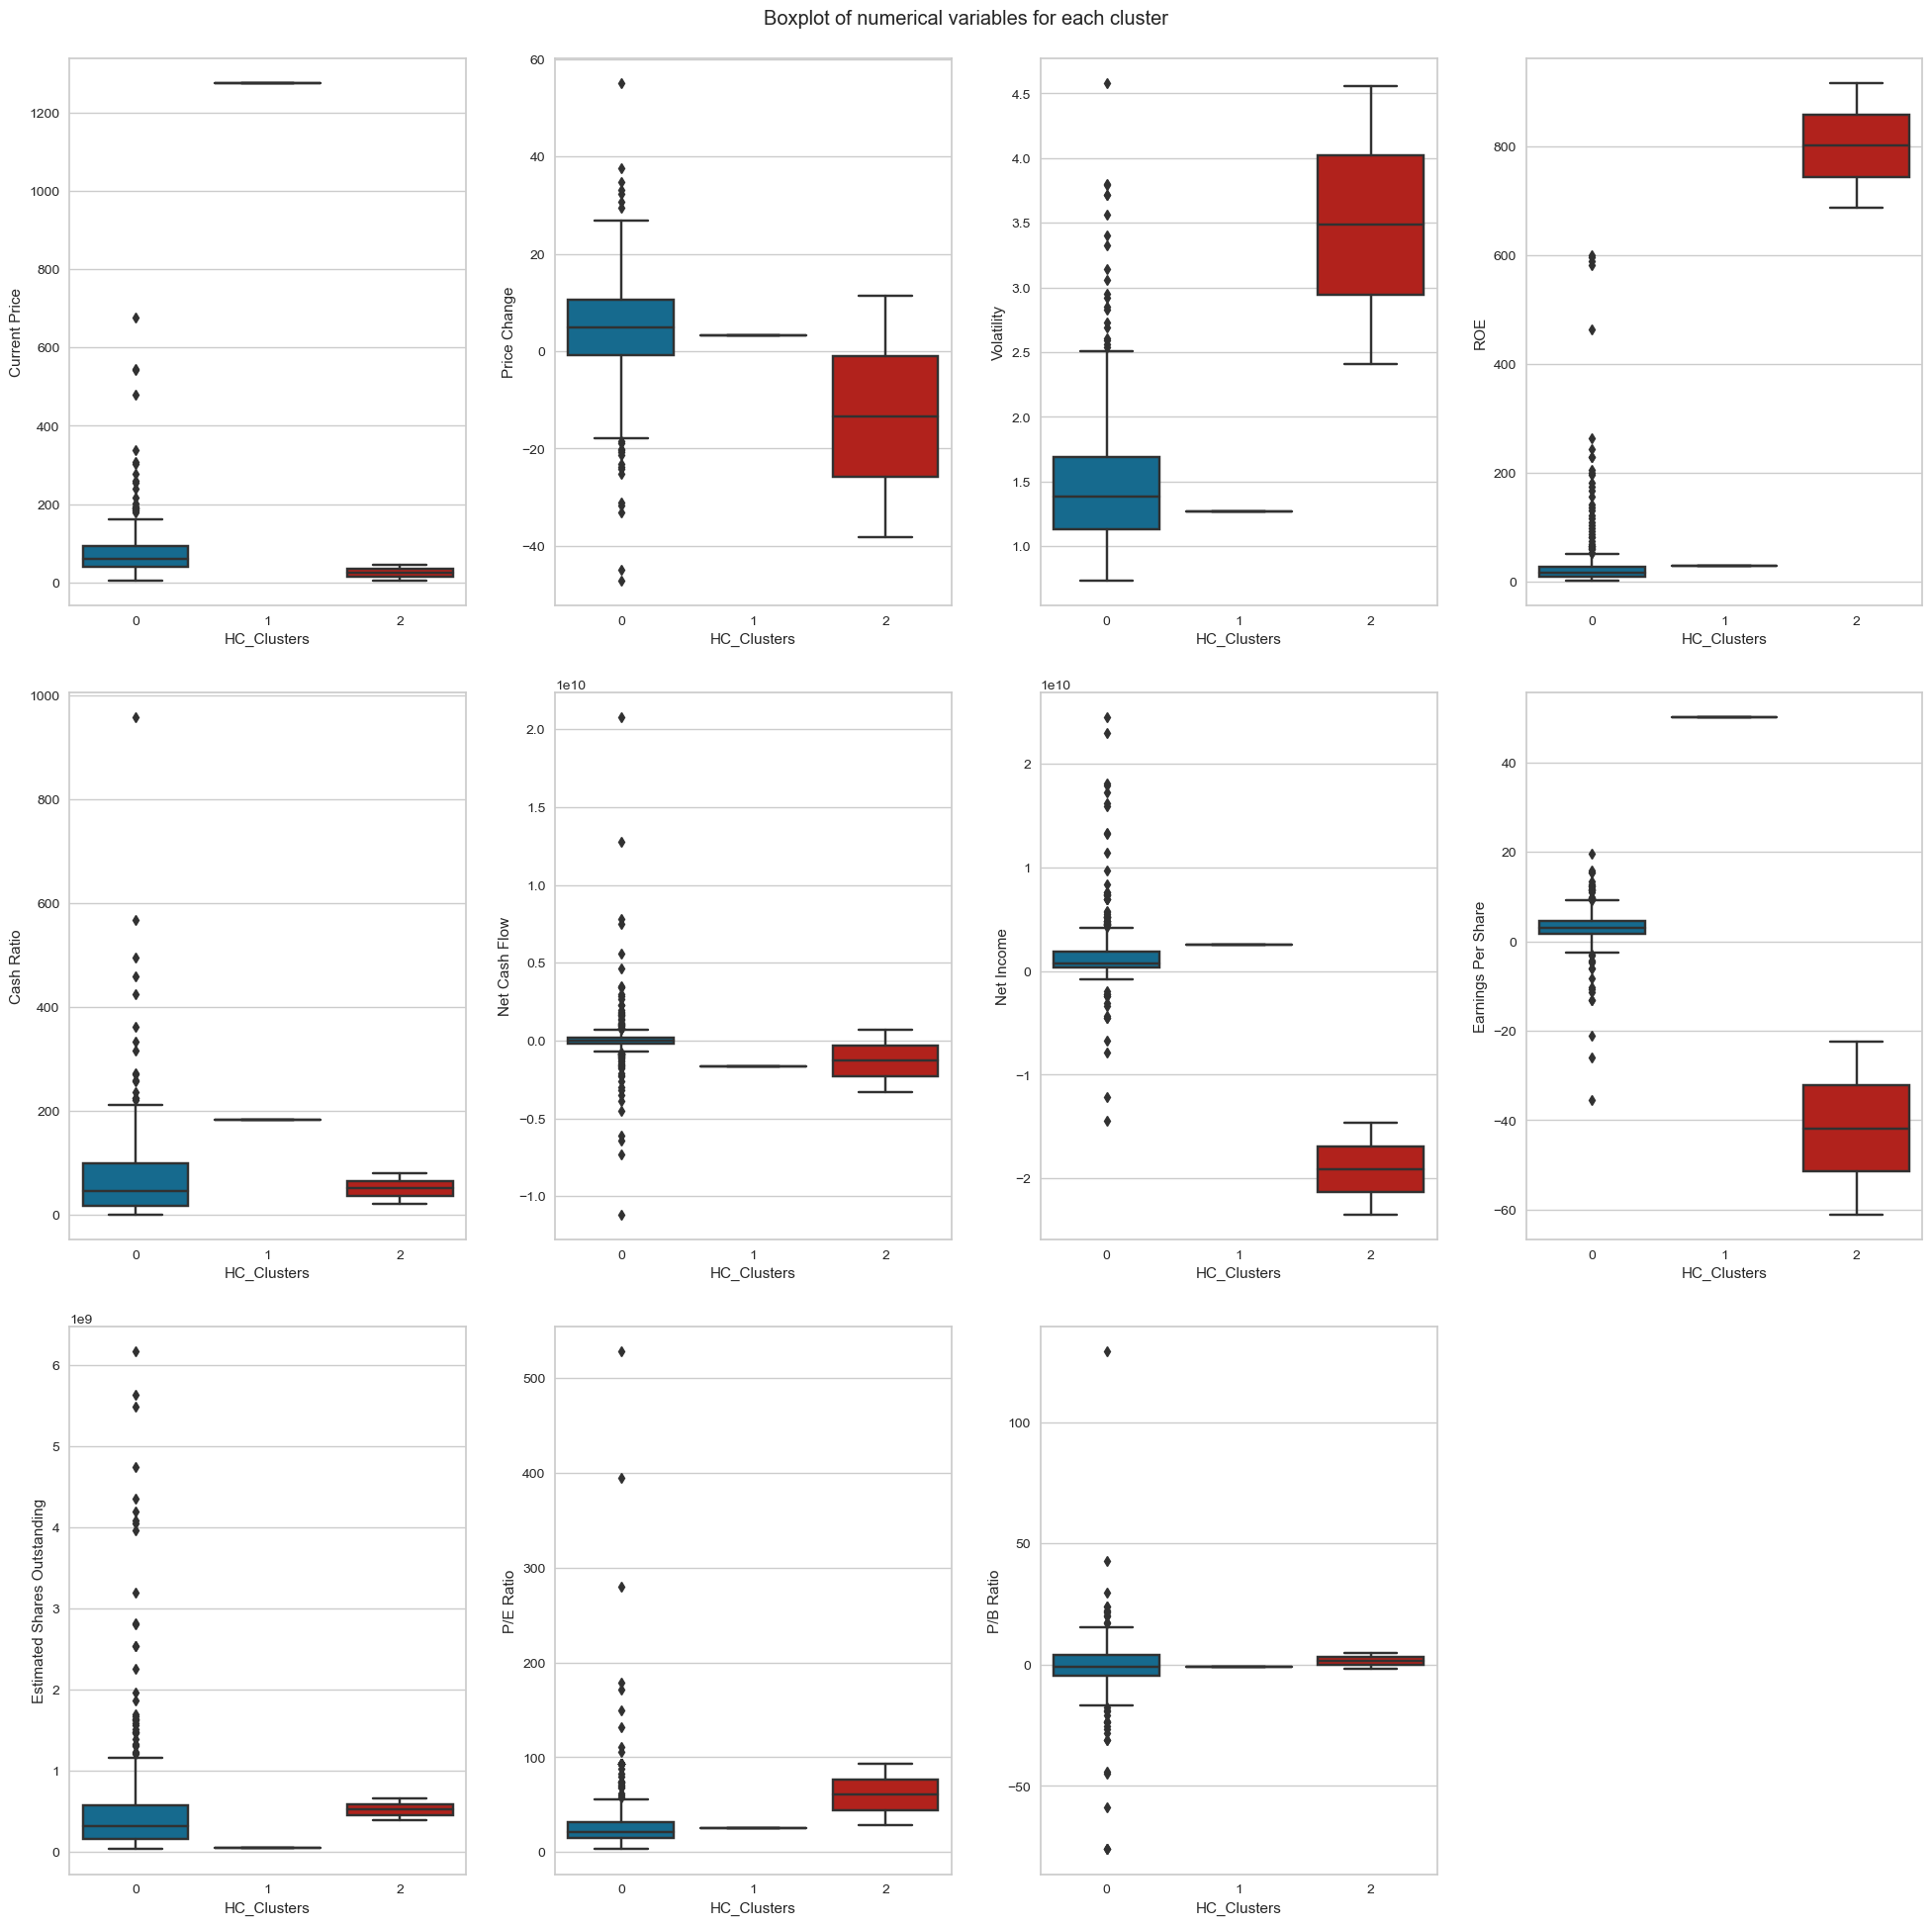

In [85]:
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df1, x="HC_Clusters", y=variable)

plt.tight_layout(pad=2.0)

<Axes: xlabel='HC_Clusters'>

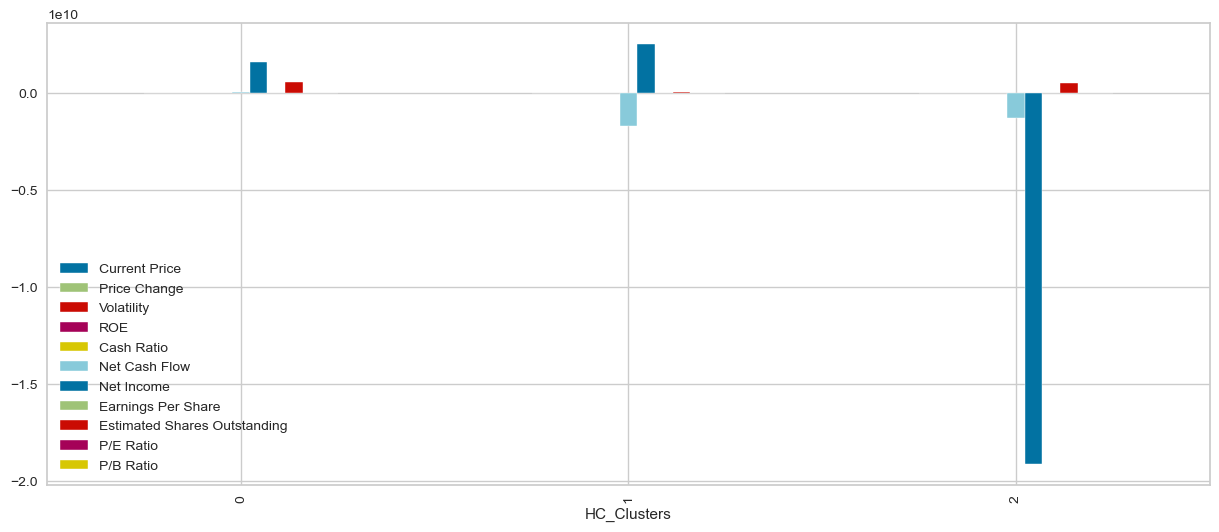

In [86]:
df1.groupby("HC_Clusters").mean(numeric_only=True).plot.bar(figsize=(15, 6))

## K-means vs Hierarchical Clustering

**Which clustering technique took less time for execution?**
  
  Both Clustering took less time.

**Which clustering technique gave you more distinct clusters, or are they the same?**

   K means clustering (silhouette) and hierarchical clustering are having same number of clusters.

**How many observations are there in the similar clusters of both algorithms?**
  

In [105]:
cross_tab = pd.crosstab(df['K_means_segments'], df1['HC_Clusters'])

# Display the cross-tabulation
print(cross_tab)

# Find the maximum overlap (similar clusters)
similar_clusters = cross_tab.idxmax(axis=1)  # This will give you the HC cluster with the most overlap for each K-means cluster
overlap_counts = cross_tab.max(axis=1)  # Number of observations in the most similar clusters

# Sum of overlaps for similar clusters
total_overlap = overlap_counts.sum()

print(f'Total number of observations in similar clusters: {total_overlap}')

HC_Clusters         0  1  2
K_means_segments           
0                 267  0  0
1                  11  0  0
2                   1  0  2
3                   5  0  0
4                  23  1  0
5                  30  0  0
Total number of observations in similar clusters: 338


 **How many clusters are obtained as the appropriate number of clusters from both algorithms?**

The appropriate number of clusters for both algorithms appears to be 3, as this is where the most substantial alignment occurs.

## Actionable Insights and Recommendations

- Health care shows the maximum price increase, indicating strong performance.
- It ranks third for investment attractiveness, following Consumer Staples and Information Technology.
- Health care has a high cash ratio, signaling strong liquidity.
- Information Technology has the highest cash ratio, indicating strong financial health.
- The highest P/E ratio, indicating that Energy stocks may be overvalued.
- Cluster 0: Stable, profitable companies with strong liquidity and modest growth.
- Cluster 1: High profitability and ROE, but negative cash flow due to investments or debt.
- Cluster 2: High volatility, substantial losses, and negative earnings, yet with unusually high ROE.
- Cluster 3: High stock prices, strong price growth, but with financial distress indicators like negative cash flow and P/B ratio.
- Cluster 4: High-growth, high-value companies with strong cash reserves and profitability.
- Cluster 5: Companies with recent stock price declines and high volatility, operating at a loss.


### Recommendations
- Diversification: Allocate investments across Clusters 0, 1, and 4 for a balanced portfolio, combining stability, value, and growth.
- Caution in Cluster 2 and 5: These clusters represent higher risk and should be approached with caution, especially by more conservative investors.
- Sector Focus: Prioritize Health Care, Consumer Staples, and Information Technology sectors for stable growth, while cautiously exploring opportunities in Energy and Real Estate for potential high returns.